<a href="https://colab.research.google.com/github/JodhiKrisantus/Classification-Holiday-Package-Prediction/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Holiday Package Prediction**
Pandas Lovers <br>
Data Science Batch 32

# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 19% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan conversion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue
- conversion rate

**IMPORT LIBRARY**

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import matplotlib.patches
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.7.1
0.12.2
1.5.3


**IMPORT DATASET**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

# **EDA, INSIGHT & VISUALIZATION**

## **1. Descriptive Statistics**

**QUICK LOOK**

In [5]:
df.sample(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
1764      201764          0  37.0  Company Invited         1             15.0   
1432      201432          0  37.0     Self Enquiry         1             16.0   
2475      202475          0  45.0     Self Enquiry         1             17.0   
4582      204582          0  29.0     Self Enquiry         1             16.0   
1232      201232          0  35.0     Self Enquiry         1             33.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
1764  Small Business    Male                       2                3.0   
1432        Salaried  Female                       2                1.0   
2475        Salaried    Male                       3                4.0   
4582  Small Business  Female                       4                4.0   
1232        Salaried    Male                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
1764          Basic                    3.0       Married            2.0   
1432       Standard                    3.0       Married            2.0   
2475         Deluxe                    3.0      Divorced            4.0   
4582          Basic                    3.0       Married            7.0   
1232         Deluxe                    3.0       Married            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
1764         1                       1       0                       1.0   
1432         1                       1       0                       1.0   
2475         1                       3       1                       2.0   
4582         0                       3       0                       1.0   
1232         0                       5       0                       1.0   

         Designation  MonthlyIncome  
1764       Executive        17326.0  
1432  Senior Manager        28744.0  
2475         Manager        25143.0  
4582       Executive        21055.0  
1232         Manager        21883.0

In [6]:
# cek kesesuaian tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [7]:
# cek kolom kosong
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan MISSING VALUE**

In [8]:
print('Banyak data dan kolom : ',df.shape)
print('Jumlah ID Customer duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah data duplikat',df.duplicated().sum())

Banyak data dan kolom :  (4888, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat 0


In [9]:
mv=df.isnull().sum()
tmv=df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

Missing Value Total  Missing Value Percentage (%)
CustomerID                                  0                      0.000000
ProdTaken                                   0                      0.000000
Age                                       226                      4.623568
TypeofContact                              25                      0.511457
CityTier                                    0                      0.000000
DurationOfPitch                           251                      5.135025
Occupation                                  0                      0.000000
Gender                                      0                      0.000000
NumberOfPersonVisiting                      0                      0.000000
NumberOfFollowups                          45                      0.920622
ProductPitched                              0                      0.000000
PreferredPropertyStar                      26                      0.531915
MaritalStatus                               0                      0.000000
NumberOfTrips                             140                      2.864157
Passport                                    0                      0.000000
PitchSatisfactionScore                      0                      0.000000
OwnCar                                      0                      0.000000
NumberOfChildrenVisiting                   66                      1.350245
Designation                                 0                      0.000000
MonthlyIncome                             233                      4.766776

<Axes: >

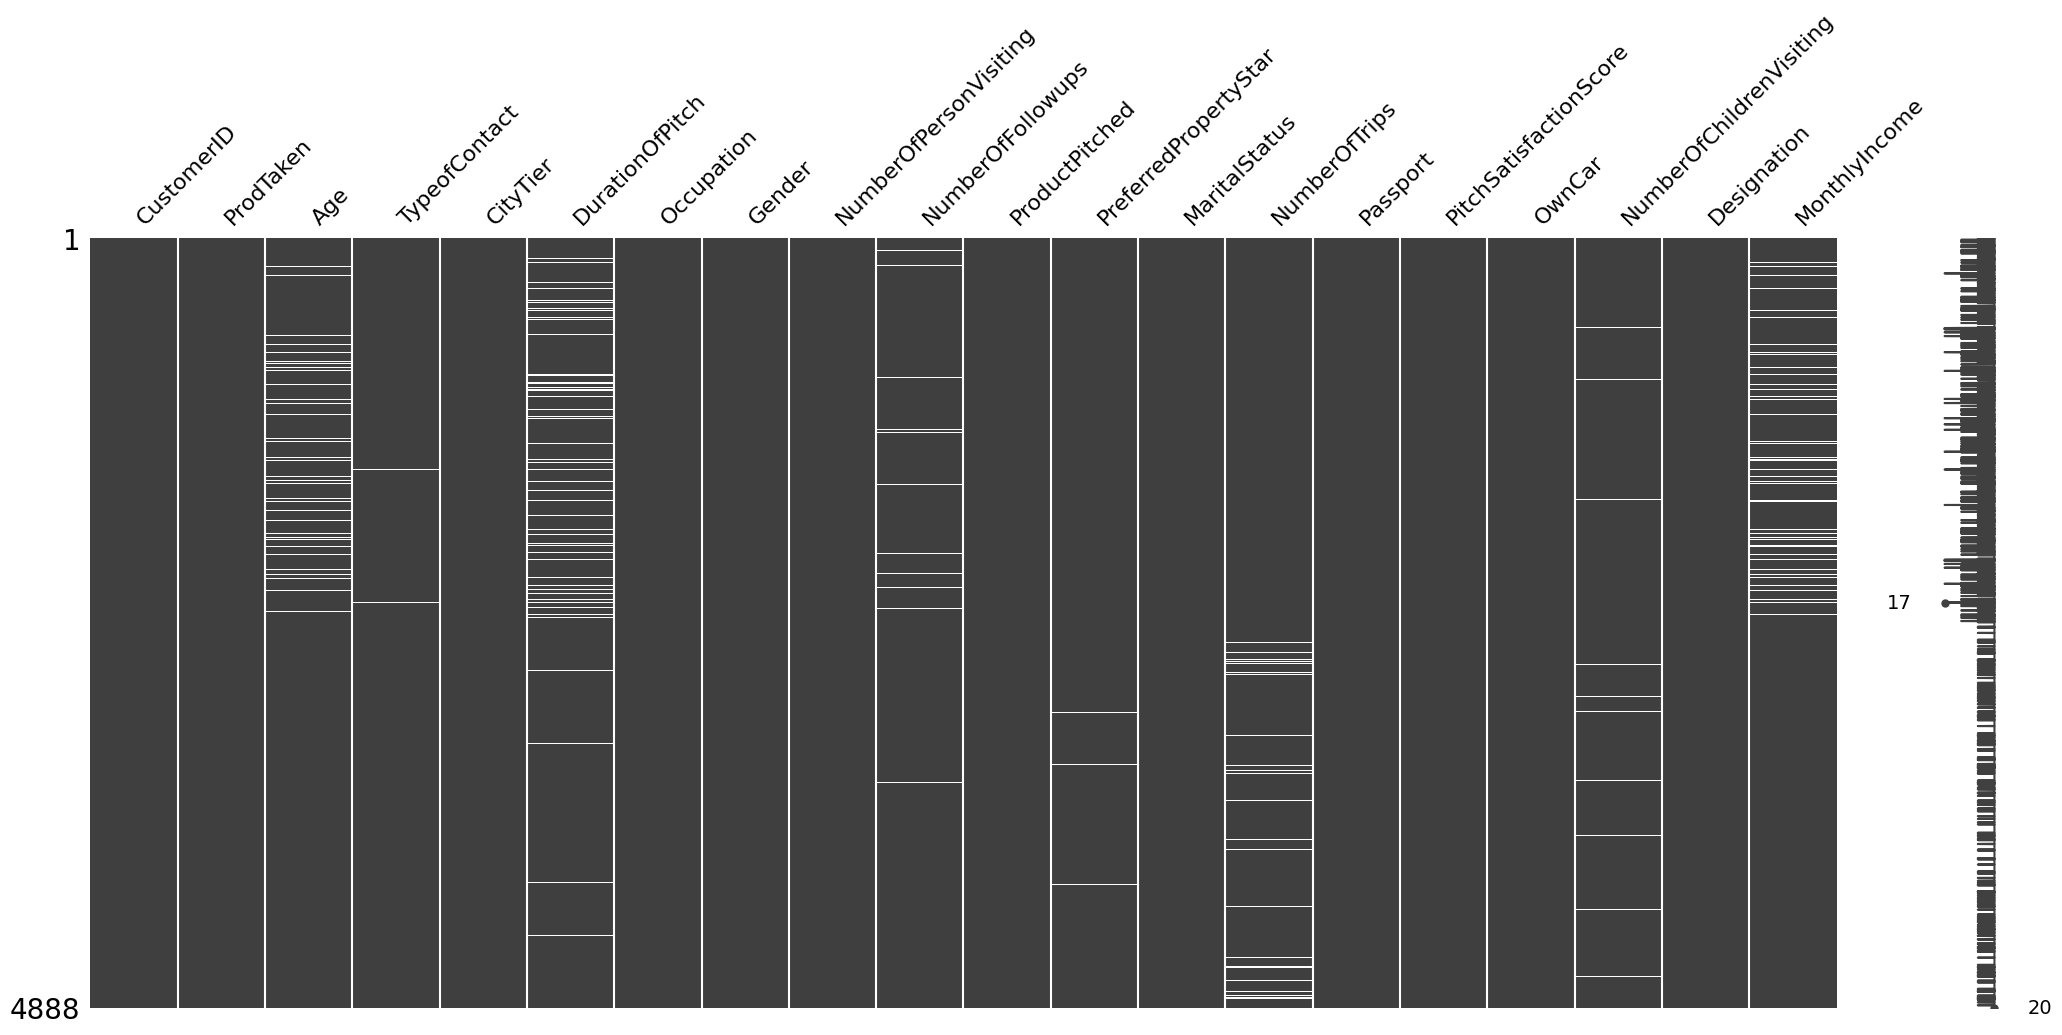

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
# pengelompokan kolom berdasarkan jenisnya
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [12]:
# cek nilai unik pada kolom categorical
for i in categorical:
    print(df[i].value_counts(), end="\n\n")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



In [13]:
# cek nilai summary
df.describe()

CustomerID    ProdTaken          Age     CityTier  DurationOfPitch  \
count    4888.000000  4888.000000  4662.000000  4888.000000      4637.000000   
mean   202443.500000     0.188216    37.622265     1.654255        15.490835   
std      1411.188388     0.390925     9.316387     0.916583         8.519643   
min    200000.000000     0.000000    18.000000     1.000000         5.000000   
25%    201221.750000     0.000000    31.000000     1.000000         9.000000   
50%    202443.500000     0.000000    36.000000     1.000000        13.000000   
75%    203665.250000     0.000000    44.000000     3.000000        20.000000   
max    204887.000000     1.000000    61.000000     3.000000       127.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4888.000000        4843.000000            4862.000000   
mean                 2.905074           3.708445               3.581037   
std                  0.724891           1.002509               0.798009   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4748.000000  4888.000000             4888.000000  4888.000000   
mean        3.236521     0.290917                3.078151     0.620295   
std         1.849019     0.454232                1.365792     0.485363   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4822.000000    4655.000000  
mean                   1.187267   23619.853491  
std                    0.857861    5380.698361  
min                    0.000000    1000.000000  
25%                    1.000000   20346.000000  
50%                    1.000000   22347.000000  
75%                    2.000000   25571.000000  
max                    3.000000   98678.000000

In [14]:
df[diskrit].describe().T

count      mean       std  min  25%  50%  75%   max
ProdTaken                 4888.0  0.188216  0.390925  0.0  0.0  0.0  0.0   1.0
CityTier                  4888.0  1.654255  0.916583  1.0  1.0  1.0  3.0   3.0
NumberOfPersonVisiting    4888.0  2.905074  0.724891  1.0  2.0  3.0  3.0   5.0
NumberOfFollowups         4843.0  3.708445  1.002509  1.0  3.0  4.0  4.0   6.0
PreferredPropertyStar     4862.0  3.581037  0.798009  3.0  3.0  3.0  4.0   5.0
NumberOfTrips             4748.0  3.236521  1.849019  1.0  2.0  3.0  4.0  22.0
Passport                  4888.0  0.290917  0.454232  0.0  0.0  0.0  1.0   1.0
PitchSatisfactionScore    4888.0  3.078151  1.365792  1.0  2.0  3.0  4.0   5.0
OwnCar                    4888.0  0.620295  0.485363  0.0  0.0  1.0  1.0   1.0
NumberOfChildrenVisiting  4822.0  1.187267  0.857861  0.0  1.0  1.0  2.0   3.0

In [15]:
df[num].describe().T

count          mean          std     min      25%      50%  \
Age              4662.0     37.622265     9.316387    18.0     31.0     36.0   
DurationOfPitch  4637.0     15.490835     8.519643     5.0      9.0     13.0   
MonthlyIncome    4655.0  23619.853491  5380.698361  1000.0  20346.0  22347.0   

                     75%      max  
Age                 44.0     61.0  
DurationOfPitch     20.0    127.0  
MonthlyIncome    25571.0  98678.0

In [16]:
df[categorical].describe().T

count unique           top  freq
TypeofContact   4863      2  Self Enquiry  3444
Occupation      4888      4      Salaried  2368
Gender          4888      3          Male  2916
ProductPitched  4888      5         Basic  1842
MaritalStatus   4888      4       Married  2340
Designation     4888      5     Executive  1842

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Terdapat 6 kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, dan `Age` yang bertipe data float, sehingga nantinya harus kita ubah menjadi tipe data integer.

- Terdapat 8 kolom yang memiliki missing value, yaitu kolom `Age`, `TypeofContact`, `DurationOfPitch`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `NumberOfChildrenVisiting`, dan `MonthlyIncome`. Kolom-kolom tersebut memiliki missing value < 10% sehingga dapat dikategorikan masih relatif aman.

- Pada kolom `NumberOfTrips`, terdapat nilai max = 22 dan min = 1. Sedangkan nilai mean (3.23) lebih besar dari median (3.0). Hal ini mengindikasikan data tersebar pada nilai-nilai yang memiliki value yang kecil, atau bisa disebut terdistribusi positive skewed.

- Kolom `MonthlyIncome` memiliki mean yang lebih besar dibandingkan nilai mediannya, yang mengindikasikan sebaran data tersebut yaitu positive skewed.

- Pada kolom `MonthlyIncome` pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data-data yang tersebar sangat jauh dari nilai rata-rata, yang kemungkinan menandakan adanya outlier.

- Tidak terdapat data yang duplikasi pada dataset ini.

- Terdapat kesalahan value pada kolom `Gender` yaitu adanya value 'Fe Male', yang nantinya harus kita handle pada saat pre-processing data.

- Pada kolom `MaritalStatus`, terdapat value yang memiliki arti sama yaitu value 'Single' dan 'Unmarried'.

## **2. Univariate Analysis**

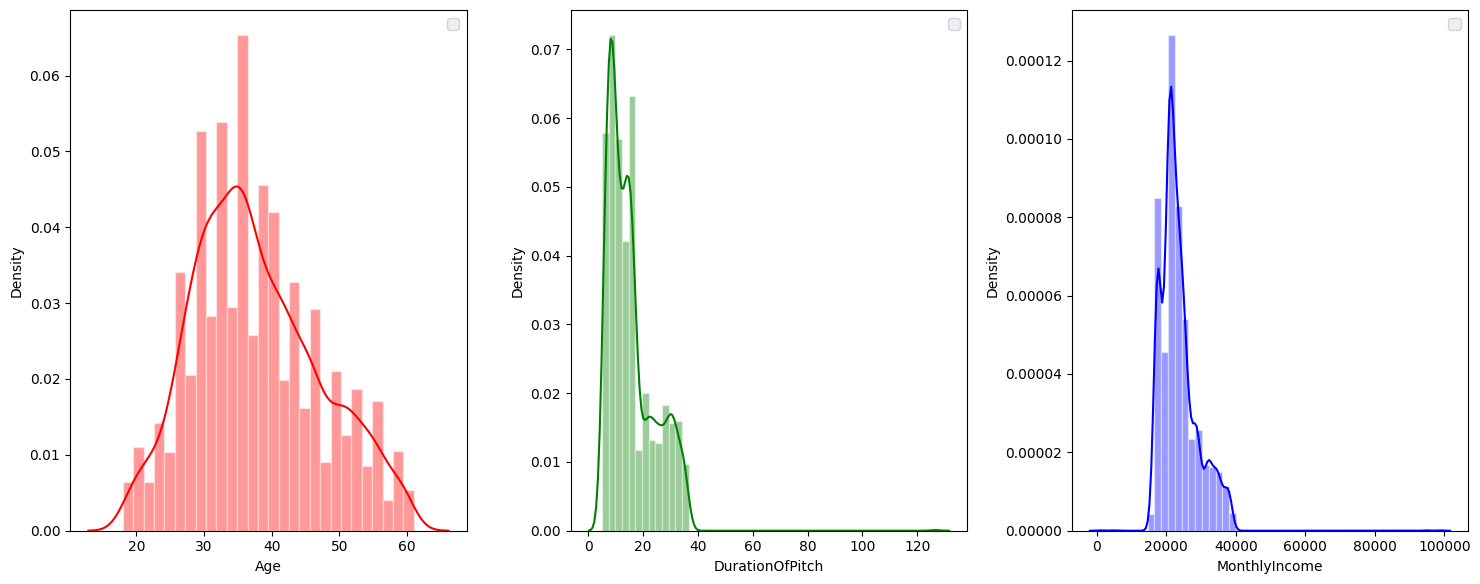

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i])
    axes[i].legend()

plt.tight_layout()
plt.show()

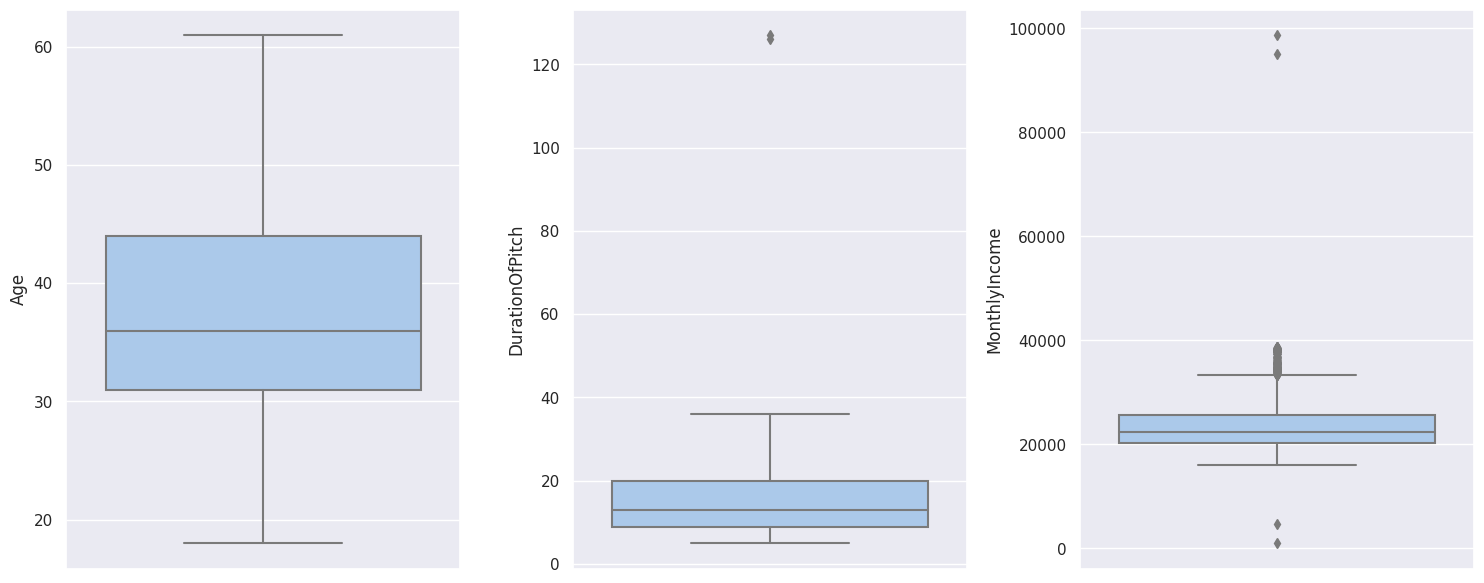

In [18]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

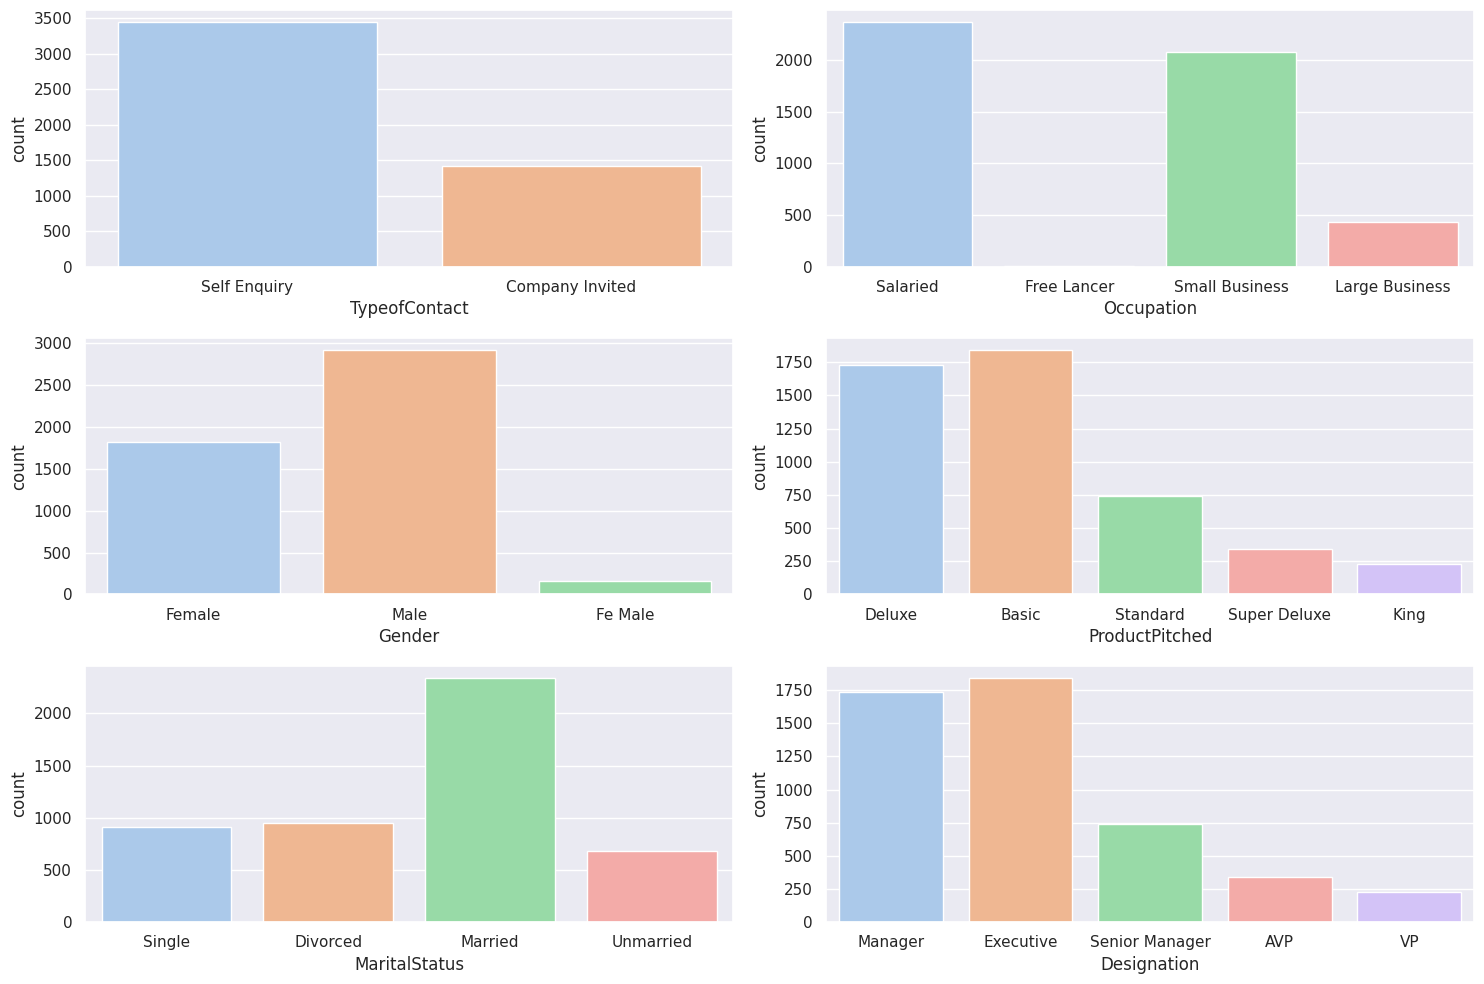

In [19]:
# plot kolom categorical
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

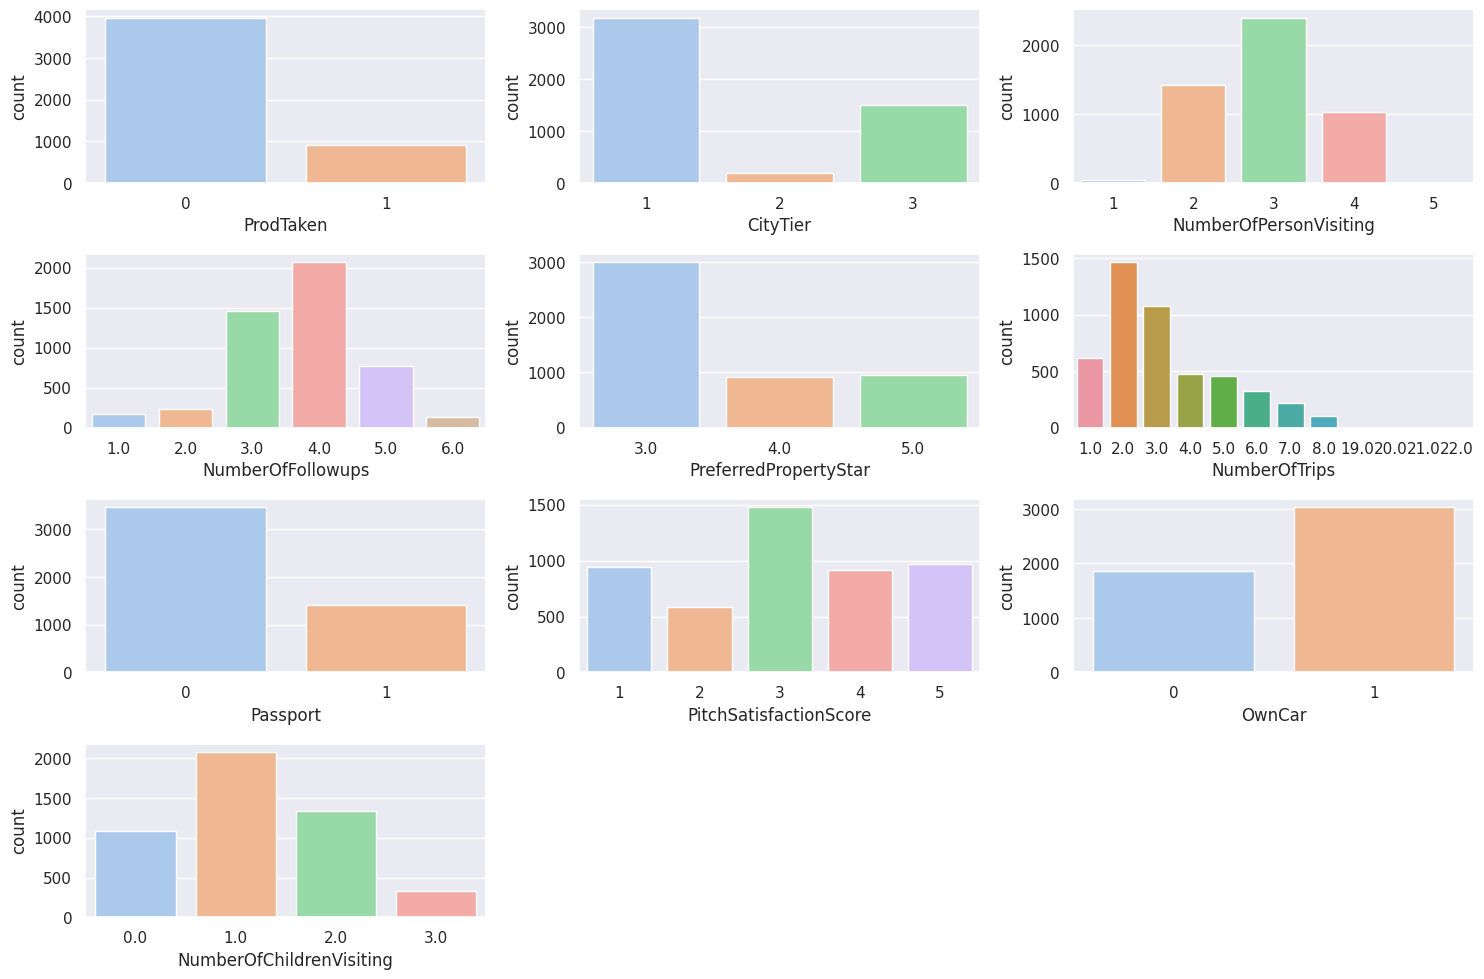

In [20]:
# plot kolom diskrit
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**HASIL OBSERVASI**

- Pada kolom `Age` distribusi datanya hampir mendekati normal.

- Pada kolom `DurationOfPitch` terlihat distribusinya positive skewed, dimana kebanyakan frekuensi data tersebar pada nilai < 20. Terlihat juga adanya outlier pada nilai > 120, sehingga nantinya akan kita ubah distribusinya menjadi normal pada saat pre-processing data.

- Pada kolom `MonthlyIncome` data tersebar pada nilai 20k-30k dan terdapat data outlier pada nilai < 10k dan > 80k. Sama seperti kolom `DurationOfPitch`, nantinya akan kita ubah distribusi datanya menjadi normal pada saat melakukan pre-processing data.

- Terdapat outlier pada kolom `NumberOfTrips`, dimana adanya nilai ekstrim yang mencapai < 19, sehingga nanti akan kita hilangkan outlier-nya pada saat pre-processing.

- Customer yang memiliki `Occupation` sebagai freelancer sangat sedikit (0,04%) jika dibandingkan dengan `Occupation` yang lain.

- Pada kolom target `ProdTaken`, terdapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frekuensi di bawah 1000. Sedangkan customer yang tidak mengambil paket wisata (ProdTaken = 0) berjumlah sangat dominan yaitu sekitar 4000 customer, sehingga ketimpangan data pada target harus diproses dengan undersampling atau oversampling pada saat data pre-processing nanti.

## **3. Multivariate Analysis**





<Axes: >

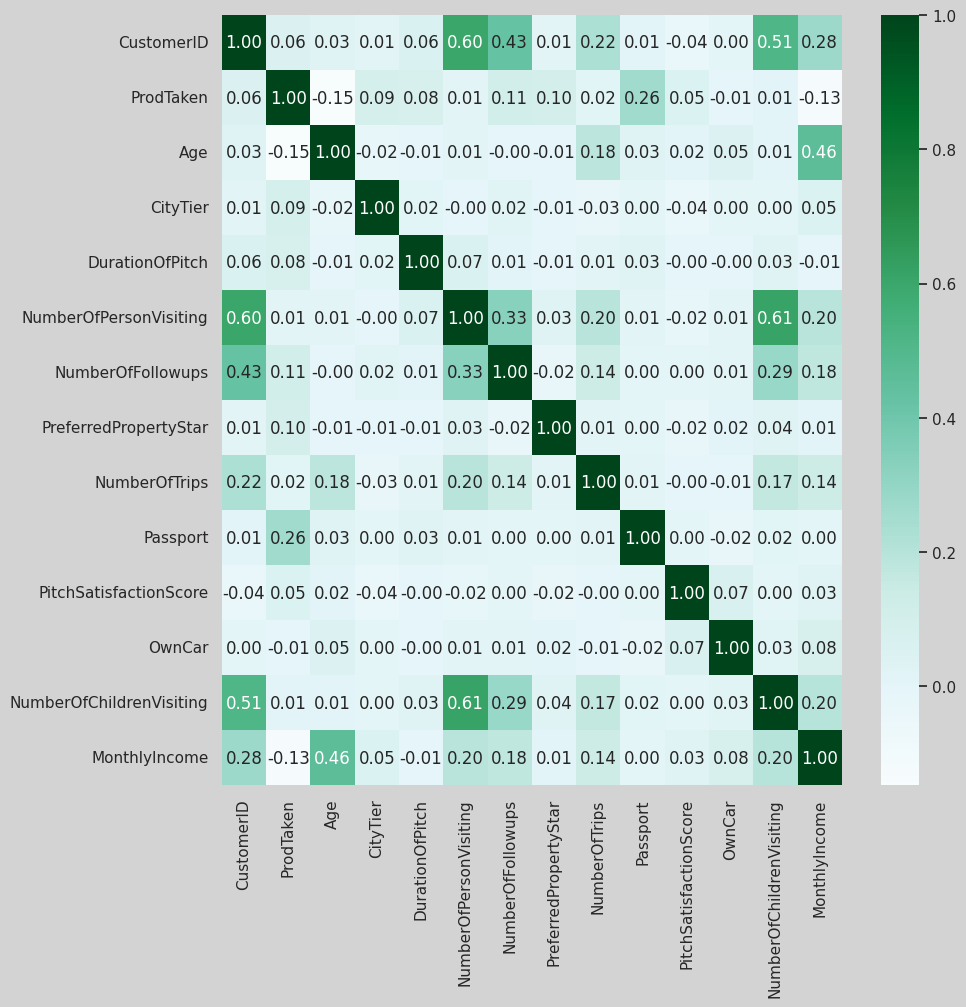

In [21]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

<Figure size 2000x2000 with 0 Axes>

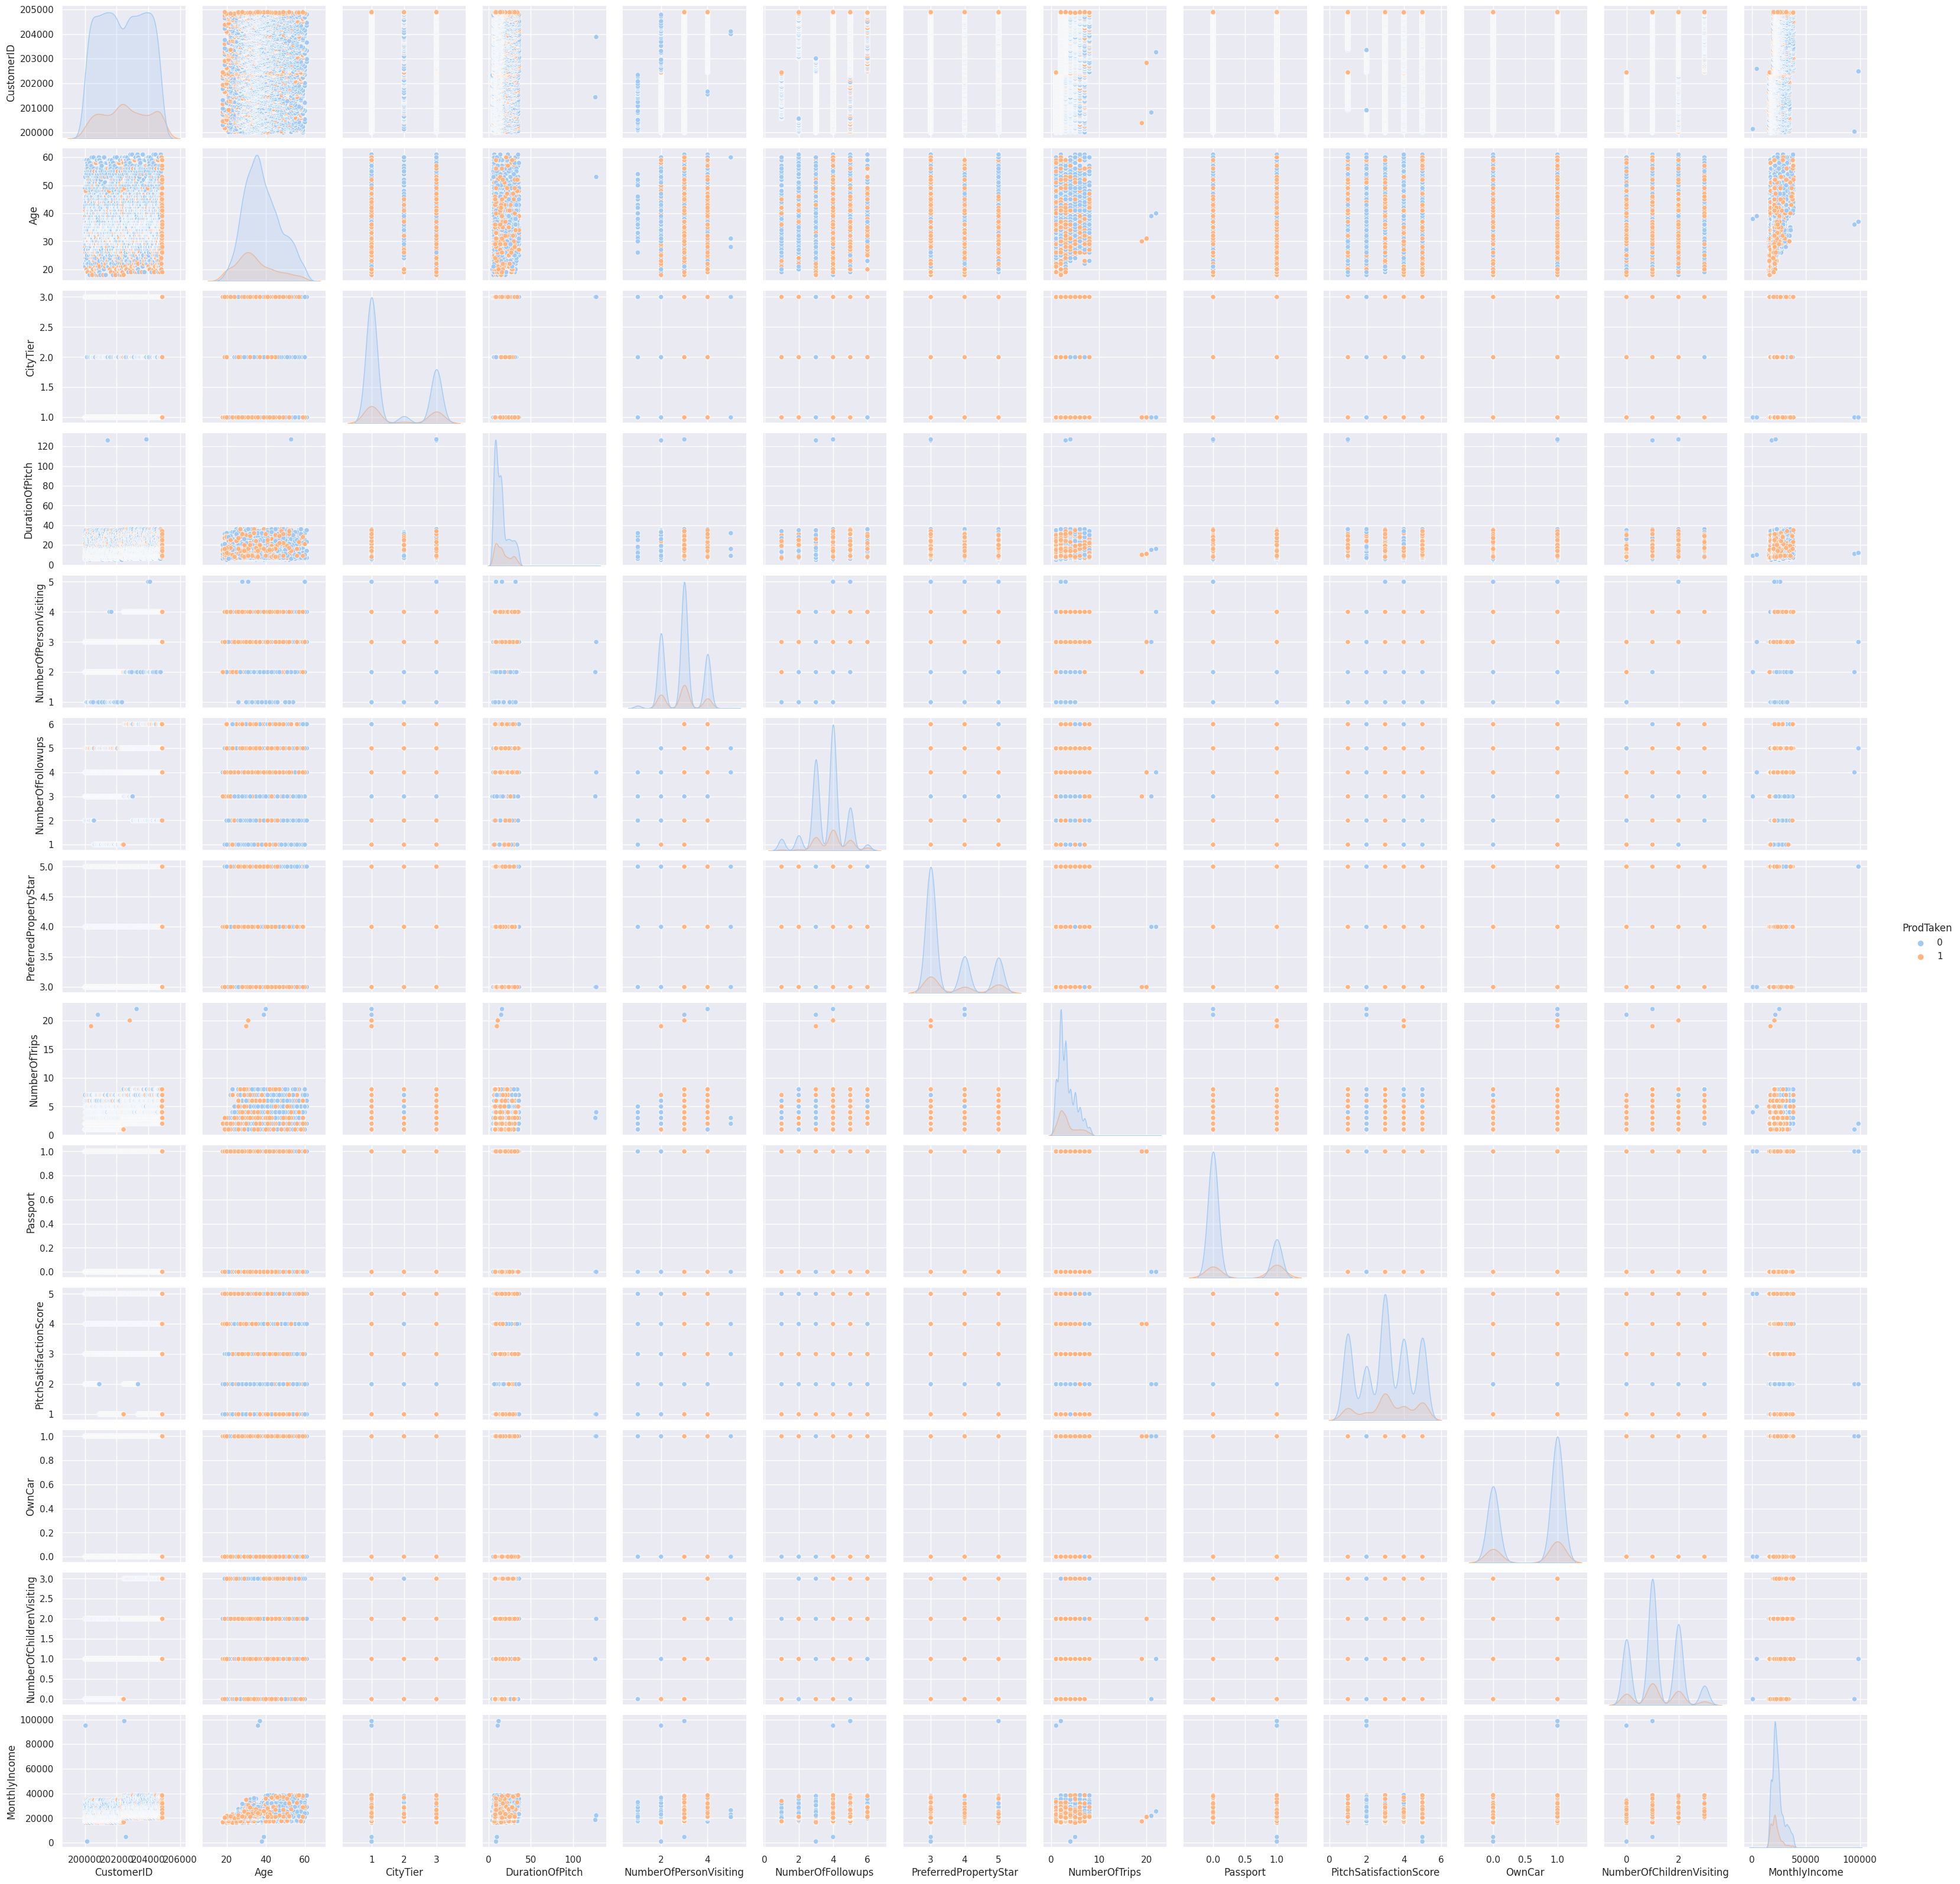

In [22]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='ProdTaken', palette='pastel')
plt.show()

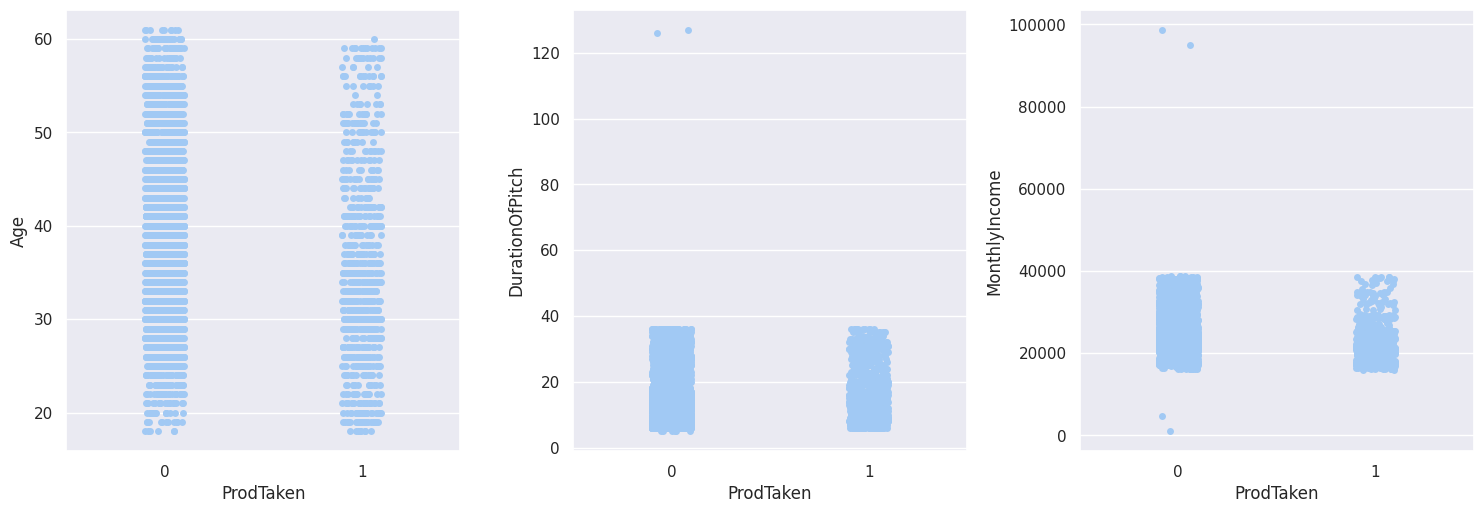

In [23]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(num)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='ProdTaken', y=num[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

**HASIL OBSERVASI**

- Dapat dilihat korelasi positif (walaupun lemah) pada variabel target kita yaitu `ProdTaken` dengan variabel `Passport`. Artinya semakin tinggi nilai passport customer (1), maka semakin tinggi pula nilai product taken-nya. Dengan kata lain, customer yang memiliki passport lebih cenderung membeli tawaran paket dibandingkan dengan customer yang tidak memiliki passport.

- Terdapat korelasi negatif antara variabel `Age` terhadap `ProdTaken` dan variabel `MonthlyIncome` terhadap `ProdTaken`, yang berarti semakin kecil nilai age atau monthly income-nya, maka semakin besar nilai product taken-nya. Dengan kata lain, customer yang berumur kecil/muda lebih cenderung membeli tawaran paket liburan dibandingkan dengan customer yang berumur tua, dan customer yang bergaji kecil cenderung membeli tawaran paket liburan dibandingkan dengan customer yang bergaji besar.

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu `NumberOfPersonVisiting` dan `NumberOfChildrenVisiting` yang membentuk korelasi positif. Pada proses feature selection, kita dapat mengeliminasi fitur yang redundan (mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya.

## **4. Business Insight**

### **1. Apakah kepemilikan Passport mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan?**

In [24]:
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [25]:
df_passport = df.groupby(['Passport','ProdTaken']).agg({'CustomerID' : ['nunique']}).reset_index()
df_passport.columns = ['Passport','ProdTaken','Total Customer']
df_passport

Passport  ProdTaken  Total Customer
0         0          0            3040
1         0          1             426
2         1          0             928
3         1          1             494

In [26]:
# menjumlahkan total customer per passport
df_passport1 = df_passport.groupby('Passport').agg({'Total Customer' : ['sum']}).reset_index()
df_passport1.columns = ['Passport','Total Customer per Passport']

# merge df yang tadi ke df yang lama
df_merge = df_passport.merge(df_passport1, on='Passport')

# membuat column baru yang berisikan persentase
df_merge['Percentage'] = round((df_merge['Total Customer'] / df_merge['Total Customer per Passport']) * 100,2)
df_merge

Passport  ProdTaken  Total Customer  Total Customer per Passport  \
0         0          0            3040                         3466   
1         0          1             426                         3466   
2         1          0             928                         1422   
3         1          1             494                         1422   

   Percentage  
0       87.71  
1       12.29  
2       65.26  
3       34.74

Text(0.8, 958, '928')

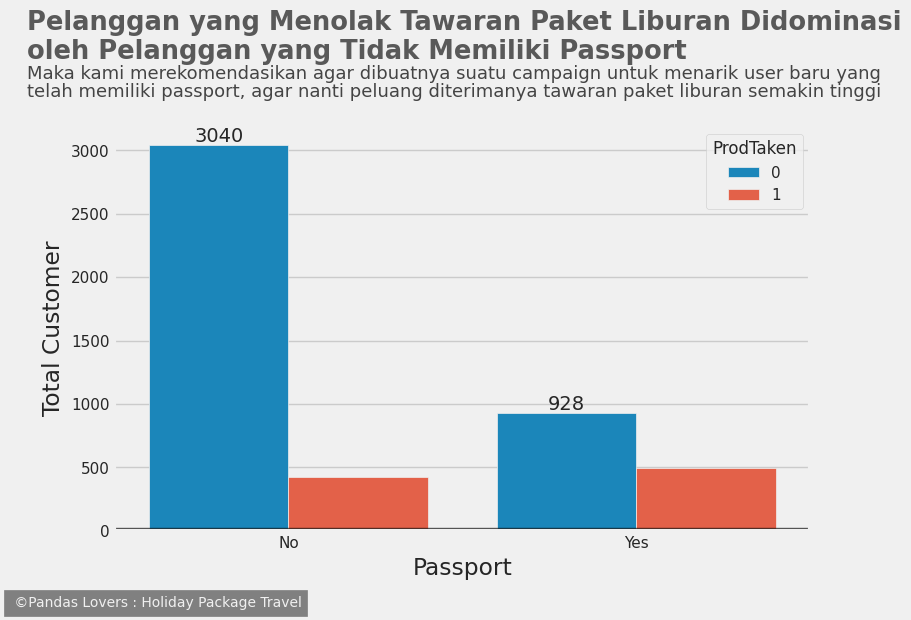

In [27]:
# membuat grafik
style.use('fivethirtyeight')

plt.figure(figsize=(8,5))

sns.barplot(x='Passport',y='Total Customer',data=df_merge,hue='ProdTaken')

plt.text(x = 0-0.75, y = 3950,
          s = 'Pelanggan yang Menolak Tawaran Paket Liburan Didominasi',
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3725,
          s = 'oleh Pelanggan yang Tidak Memiliki Passport',
          fontsize = 18.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 3560,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru yang',
         fontsize = 13, alpha = .85)
plt.text(x = 0-0.75, y = 3420,
         s = 'telah memiliki passport, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi',
         fontsize = 13, alpha = .85)
plt.text(x = -0.80, y = -600,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10,
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.axhline(y = 0, color = 'black', linewidth = 5.3, alpha = .7)


plt.xticks(ticks=[0,1], labels=['No','Yes'])


plt.text(x = 0-0.20, y = 3040+30, s = "3040", ha='center')
plt.text(x = 1-0.20, y = 928+30, s = "928", ha='center')

### **2. Apakah umur mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-0.8, -0.008, ' ©Pandas Lovers : Holiday Package Travel')

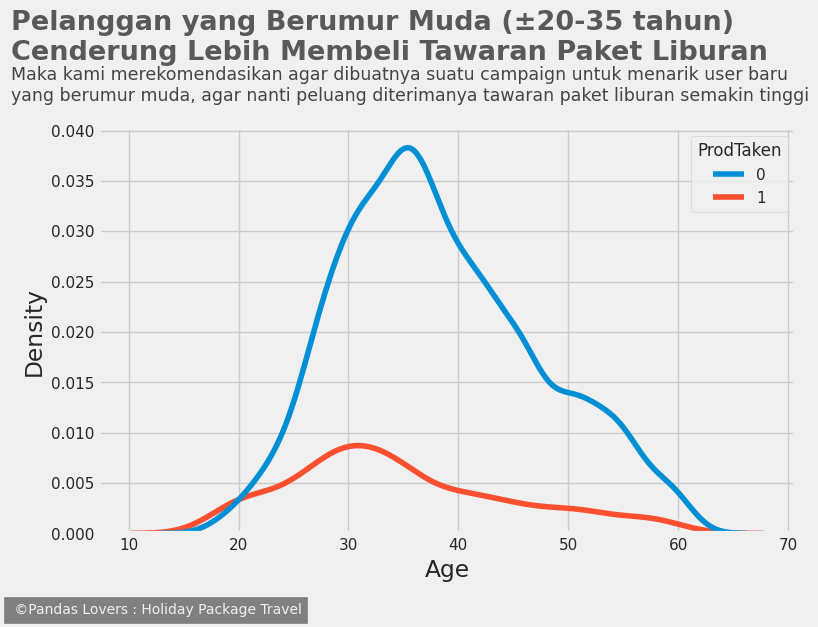

In [28]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='Age', data=df, hue='ProdTaken')

plt.text(x = 0-0.75, y = 0.050,
          s = 'Pelanggan yang Berumur Muda (±20-35 tahun)',
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.047,
          s = 'Cenderung Lebih Membeli Tawaran Paket Liburan',
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-0.75, y = 0.045,
         s = 'Maka kami merekomendasikan agar dibuatnya suatu campaign untuk menarik user baru',
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-0.75, y = 0.043,
         s = 'yang berumur muda, agar nanti peluang diterimanya tawaran paket liburan semakin tinggi',
         fontsize = 12.5, alpha = .85)
plt.text(x = -0.80, y = -0.008,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10,
               color = '#f0f0f0', backgroundcolor = 'grey')

### **3. Apakah gaji mempengaruhi keputusan pelanggan untuk membeli tawaran paket liburan atau tidak?**

Text(-16000, -2e-05, ' ©Pandas Lovers : Holiday Package Travel')

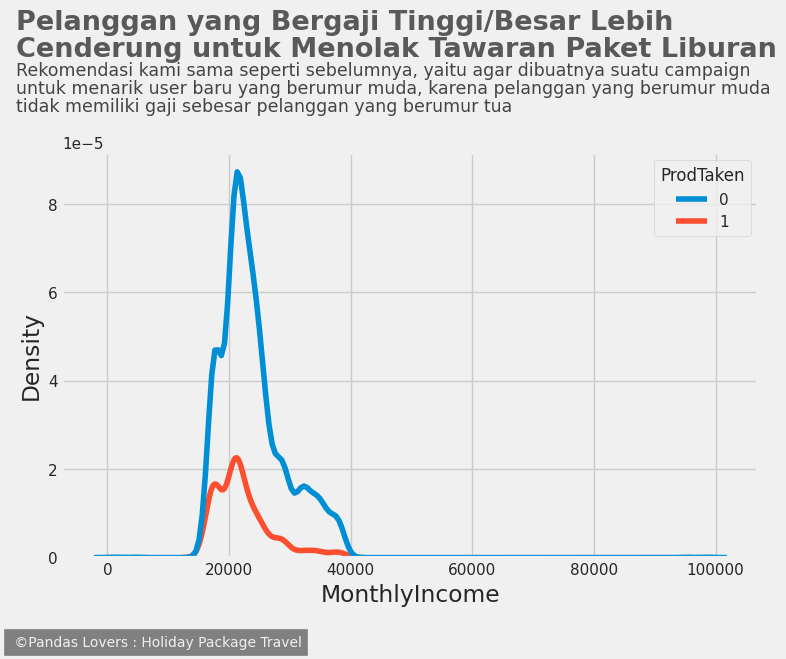

In [29]:
plt.figure(figsize=(8,5))
sns.kdeplot(x='MonthlyIncome', data=df, hue='ProdTaken')
plt.text(x = 0-15000, y = 0.0001195,
          s = 'Pelanggan yang Bergaji Tinggi/Besar Lebih',
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.0001135,
          s = 'Cenderung untuk Menolak Tawaran Paket Liburan',
          fontsize = 19.5, weight = 'bold', alpha = 0.75)
plt.text(x = 0-15000, y = 0.000109,
         s = 'Rekomendasi kami sama seperti sebelumnya, yaitu agar dibuatnya suatu campaign',
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000105,
         s = 'untuk menarik user baru yang berumur muda, karena pelanggan yang berumur muda',
         fontsize = 12.5, alpha = .85)
plt.text(x = 0-15000, y = 0.000101,
         s = 'tidak memiliki gaji sebesar pelanggan yang berumur tua',
         fontsize = 12.5, alpha = .85)
plt.text(x = -16000, y = -0.00002,
    s = ' ©Pandas Lovers : Holiday Package Travel',fontsize = 10,
               color = '#f0f0f0', backgroundcolor = 'grey')

# **DATA PRE-PROCESSING**

In [30]:
df_new = df.copy()

### **Handling Missing Value**

In [31]:
# cek missing value
df_new.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Kolom yang tidak sesuai ada 8, karena terdapat nilai kosong (missing value) : `Age` (ganti mean), `TypeofContact` (drop), `DurationOfPitch` (median), `NumberOfFollowups` (modus), `PreferredPropertyStar` (drop), `NumberOfTrips` (drop), `NumberOfChildrenVisiting` (drop), `MonthlyIncome` (median)

In [32]:
# drop missing value
df_new.dropna(subset=['TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [33]:
# imputasi missing value dengan mode, median & mean
df_new['Age'].fillna(df_new['Age'].mean(), inplace=True)
df_new['DurationOfPitch'].fillna(df_new['DurationOfPitch'].median(), inplace=True)
df_new['NumberOfFollowups'].fillna(df_new['NumberOfFollowups'].mode()[0], inplace=True)
df_new['MonthlyIncome'].fillna(df_new['MonthlyIncome'].median(), inplace=True)

In [34]:
# cek kembali missing value
df_new.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### **Handling Invalid Data Types**

In [35]:
# cek type data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4631 non-null   int64  
 1   ProdTaken                 4631 non-null   int64  
 2   Age                       4631 non-null   float64
 3   TypeofContact             4631 non-null   object 
 4   CityTier                  4631 non-null   int64  
 5   DurationOfPitch           4631 non-null   float64
 6   Occupation                4631 non-null   object 
 7   Gender                    4631 non-null   object 
 8   NumberOfPersonVisiting    4631 non-null   int64  
 9   NumberOfFollowups         4631 non-null   float64
 10  ProductPitched            4631 non-null   object 
 11  PreferredPropertyStar     4631 non-null   float64
 12  MaritalStatus             4631 non-null   object 
 13  NumberOfTrips             4631 non-null   float64
 14  Passport

In [36]:
# ubah tipe data dari float menjadi integer
df_new = df_new.astype({"Age":'int', "DurationOfPitch":'int','NumberOfFollowups':'int', 'PreferredPropertyStar':'int',
                        "NumberOfTrips":'int', "NumberOfChildrenVisiting":'int', "MonthlyIncome":'int'})

In [37]:
# cek kembali tipe data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4631 non-null   int64 
 1   ProdTaken                 4631 non-null   int64 
 2   Age                       4631 non-null   int64 
 3   TypeofContact             4631 non-null   object
 4   CityTier                  4631 non-null   int64 
 5   DurationOfPitch           4631 non-null   int64 
 6   Occupation                4631 non-null   object
 7   Gender                    4631 non-null   object
 8   NumberOfPersonVisiting    4631 non-null   int64 
 9   NumberOfFollowups         4631 non-null   int64 
 10  ProductPitched            4631 non-null   object
 11  PreferredPropertyStar     4631 non-null   int64 
 12  MaritalStatus             4631 non-null   object
 13  NumberOfTrips             4631 non-null   int64 
 14  Passport                

### **Handling Duplicated Data**

In [38]:
print('Banyak data dan kolom : ',df_new.shape)
print('Jumlah ID Customer duplikat : ',df_new['CustomerID'].duplicated().sum())
print('Jumlah data duplikat : ',df_new.duplicated().sum())

Banyak data dan kolom :  (4631, 20)
Jumlah ID Customer duplikat :  0
Jumlah data duplikat :  0


Tidak perlu ada yang di-handling karena tidak terdapat data yang duplikat pada dataset ini.


### **Handling Invalid Value**

In [39]:
# ubah value Fe Male menjadi Female
df_new = df_new.replace('Fe Male', 'Female')

In [40]:
df_new['Gender'].value_counts()

Male      2765
Female    1866
Name: Gender, dtype: int64

### **Handling Outliers**

Karena kita akan menggunakan model non-linear / model yang robust terhadap outliers, maka kita tidak akan menghilangkan data outliers-nya.

### **Feature Transformation**

In [41]:
# DurationOfPitch dan MonthlyIncome dinormalisasi/re-scale
df_new['MonthlyIncome'] = MinMaxScaler().fit_transform(df_new['MonthlyIncome'].values.reshape(len(df_new), 1))
df_new['DurationOfPitch'] = MinMaxScaler().fit_transform(df_new['DurationOfPitch'].values.reshape(len(df_new), 1))

# Age distandarisasi (karena distribusi datanya sudah mendekati normal)
df_new['Age'] = StandardScaler().fit_transform(df_new['Age'].values.reshape(len(df_new), 1))

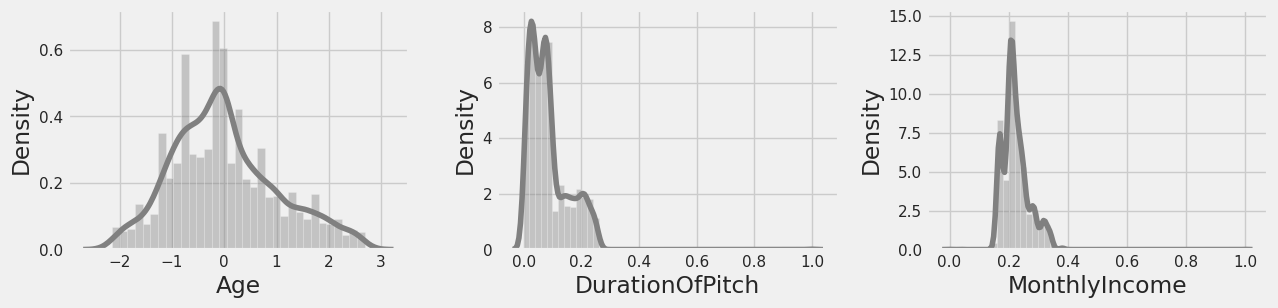

In [42]:
# data setelah normalisasi/re-scale dan standarisasi
plt.figure(figsize=(13, 9))
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df_new[num[i]], color='gray')
    plt.tight_layout()

In [43]:
df_new.describe()

CustomerID    ProdTaken           Age     CityTier  DurationOfPitch  \
count    4631.000000  4631.000000  4.631000e+03  4631.000000      4631.000000   
mean   202399.262578     0.192615  5.561903e-17     1.659253         0.085937   
std      1409.468669     0.394396  1.000108e+00     0.919468         0.068375   
min    200000.000000     0.000000 -2.145879e+00     1.000000         0.000000   
25%    201182.000000     0.000000 -6.856780e-01     1.000000         0.032787   
50%    202361.000000     0.000000 -1.240624e-01     1.000000         0.073770   
75%    203626.500000     0.000000  5.498764e-01     3.000000         0.114754   
max    204887.000000     1.000000  2.684016e+00     3.000000         1.000000   

       NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
count             4631.000000        4631.000000            4631.000000   
mean                 2.888577           3.692939               3.579572   
std                  0.725426           1.000363               0.796378   
min                  1.000000           1.000000               3.000000   
25%                  2.000000           3.000000               3.000000   
50%                  3.000000           4.000000               3.000000   
75%                  3.000000           4.000000               4.000000   
max                  5.000000           6.000000               5.000000   

       NumberOfTrips     Passport  PitchSatisfactionScore       OwnCar  \
count    4631.000000  4631.000000             4631.000000  4631.000000   
mean        3.220255     0.293457                3.070611     0.615418   
std         1.847849     0.455395                1.363827     0.486549   
min         1.000000     0.000000                1.000000     0.000000   
25%         2.000000     0.000000                2.000000     0.000000   
50%         3.000000     0.000000                3.000000     1.000000   
75%         4.000000     1.000000                4.000000     1.000000   
max        22.000000     1.000000                5.000000     1.000000   

       NumberOfChildrenVisiting  MonthlyIncome  
count               4631.000000    4631.000000  
mean                   1.168646       0.224010  
std                    0.854323       0.044664  
min                    0.000000       0.000000  
25%                    1.000000       0.197941  
50%                    1.000000       0.214705  
75%                    2.000000       0.244845  
max                    3.000000       1.000000

### **Feature Encoding**

In [44]:
# onehots encoder pada Occupation dan TypeofContact
for cat in ['Occupation','TypeofContact']:
  onehots = pd.get_dummies(df_new[cat], prefix=cat)
  df_new = df_new.join(onehots)

In [45]:
# label encoder pada Gender
df_new['Gender'] = df_new['Gender'].astype('category').cat.codes

In [46]:
df_new['ProductPitched'].value_counts()

Basic           1825
Deluxe          1713
Standard         739
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64

In [47]:
# membuat function Product
def product(x):
    if x['ProductPitched'] == 'Basic':
        product = 0
    if x['ProductPitched'] == 'Standard':
        product = 1
    if x['ProductPitched'] == 'Deluxe':
        product = 2
    if x['ProductPitched'] == 'Super Deluxe':
        product = 3
    if x['ProductPitched'] == 'King':
        product = 4
    return product

In [48]:
# menjalankan function Product
df_new['ProductPitched'] = df_new.apply(lambda x: product(x), axis=1)

In [49]:
# membuat function MaritalStatus
def status(x):
    if x['MaritalStatus'] == 'Married':
        status = 1
    else:
        status = 0
    return status

# membuat kolom baru bernama 'IsMarried' yang menjalankan function grouping
df_new['IsMarried'] = df_new.apply(lambda x: status(x), axis=1)

In [50]:
# membuat function Designation
def designation(x):
    if x['Designation'] == 'Executive':
        designation = 0
    if x['Designation'] == 'Manager':
        designation = 1
    if x['Designation'] == 'Senior Manager':
        designation = 2
    if x['Designation'] == 'AVP':
        designation = 3
    if x['Designation'] == 'VP':
        designation = 4
    return designation

In [51]:
df_new['Designation'] = df_new.apply(lambda x: designation(x), axis=1)
df_new.tail()

CustomerID  ProdTaken       Age    TypeofContact  CityTier  \
4883      204883          1  1.336138     Self Enquiry         3   
4884      204884          1 -1.022647  Company Invited         1   
4885      204885          1  1.673108     Self Enquiry         3   
4886      204886          1 -2.033556     Self Enquiry         3   
4887      204887          1 -0.124062     Self Enquiry         1   

      DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
4883         0.032787  Small Business       1                       3   
4884         0.213115        Salaried       1                       4   
4885         0.098361        Salaried       0                       4   
4886         0.090164  Small Business       1                       3   
4887         0.073770        Salaried       1                       4   

      NumberOfFollowups  ...  NumberOfChildrenVisiting  Designation  \
4883                  5  ...                         1            1   
4884                  5  ...                         2            0   
4885                  4  ...                         3            2   
4886                  4  ...                         2            0   
4887                  4  ...                         2            0   

     MonthlyIncome  Occupation_Free Lancer  Occupation_Large Business  \
4883      0.261840                       0                          0   
4884      0.206925                       0                          0   
4885      0.315527                       0                          0   
4886      0.197475                       0                          0   
4887      0.235887                       0                          0   

      Occupation_Salaried  Occupation_Small Business  \
4883                    0                          1   
4884                    1                          0   
4885                    1                          0   
4886                    0                          1   
4887                    1                          0   

      TypeofContact_Company Invited  TypeofContact_Self Enquiry  IsMarried  
4883                              0                           1          0  
4884                              1                           0          0  
4885                              0                           1          1  
4886                              0                           1          0  
4887                              0                           1          0  

[5 rows x 27 columns]

### **Feature Selection**

<Axes: >

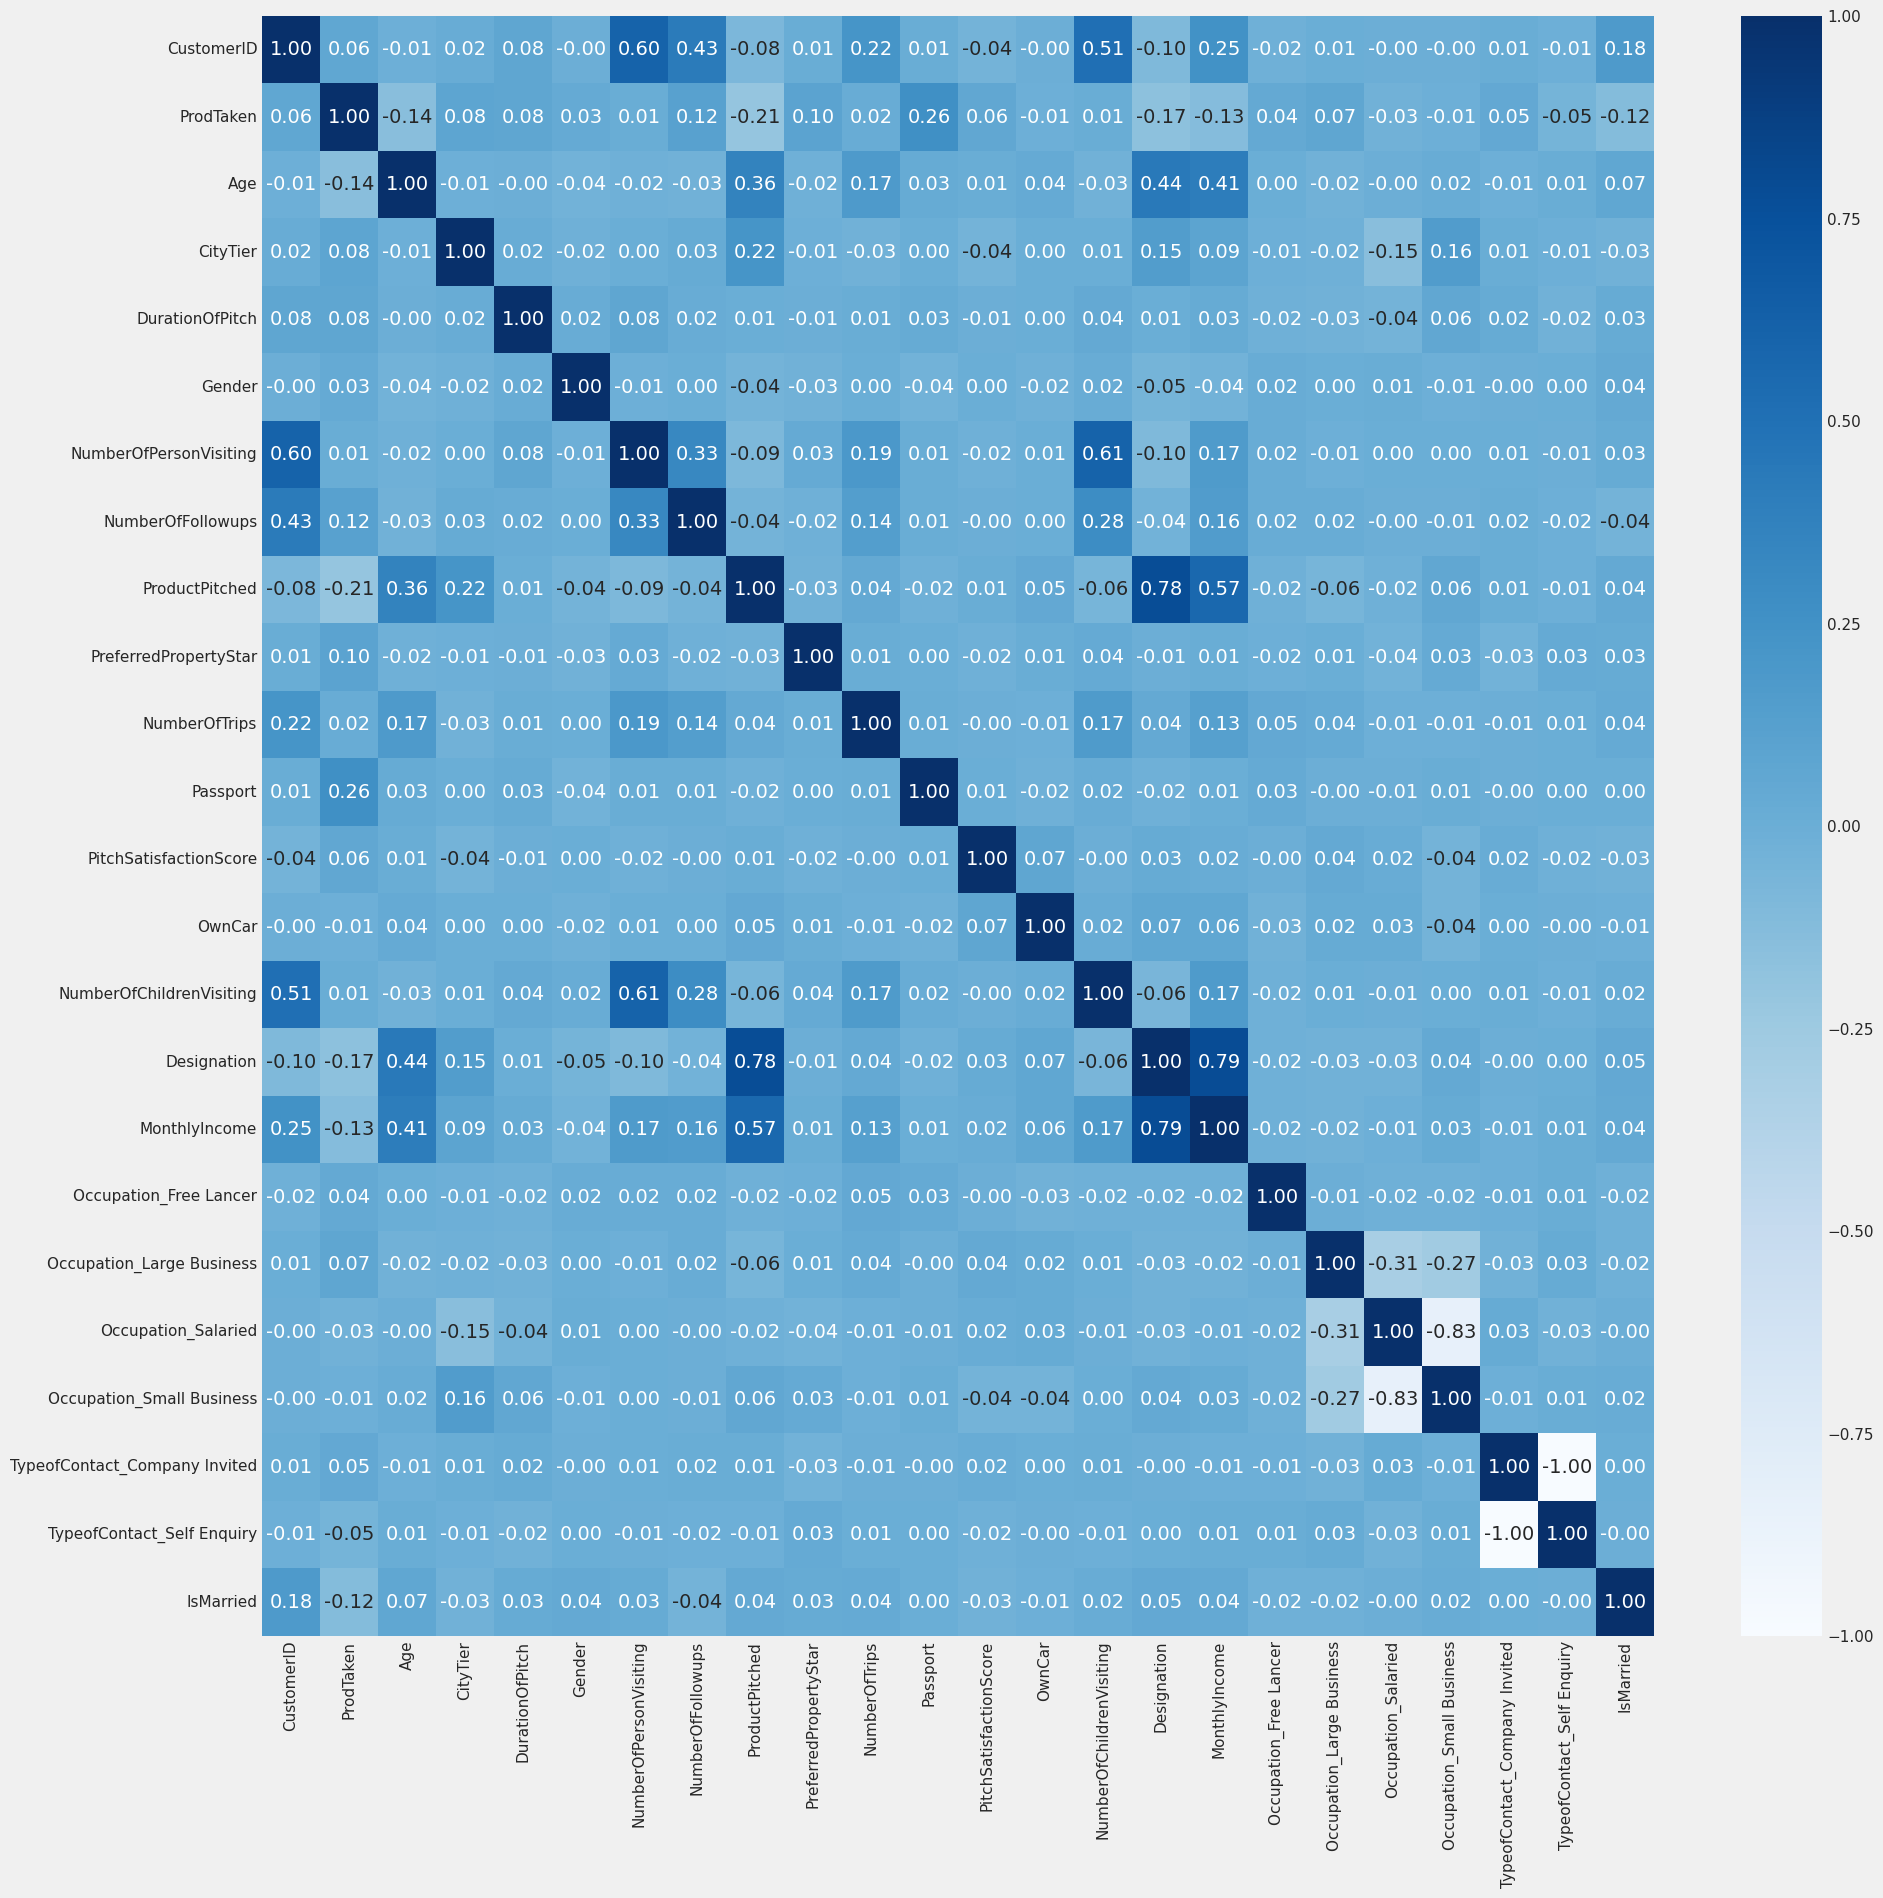

In [52]:
# cek nilai korelasi

plt.figure(figsize=(20, 20))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [53]:
# drop feature yang tidak terpakai atau korelasinya di bawah < 0,1 / -0,1
df_drop = df_new.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus','NumberOfPersonVisiting', 'Gender',
                         'NumberOfTrips','NumberOfChildrenVisiting', 'DurationOfPitch', 'OwnCar', 'PitchSatisfactionScore',
                         'Designation', 'Occupation_Salaried', 'CityTier', 'Occupation_Large Business', 'Occupation_Free Lancer',
                         'Occupation_Small Business', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry']).copy()

<Axes: >

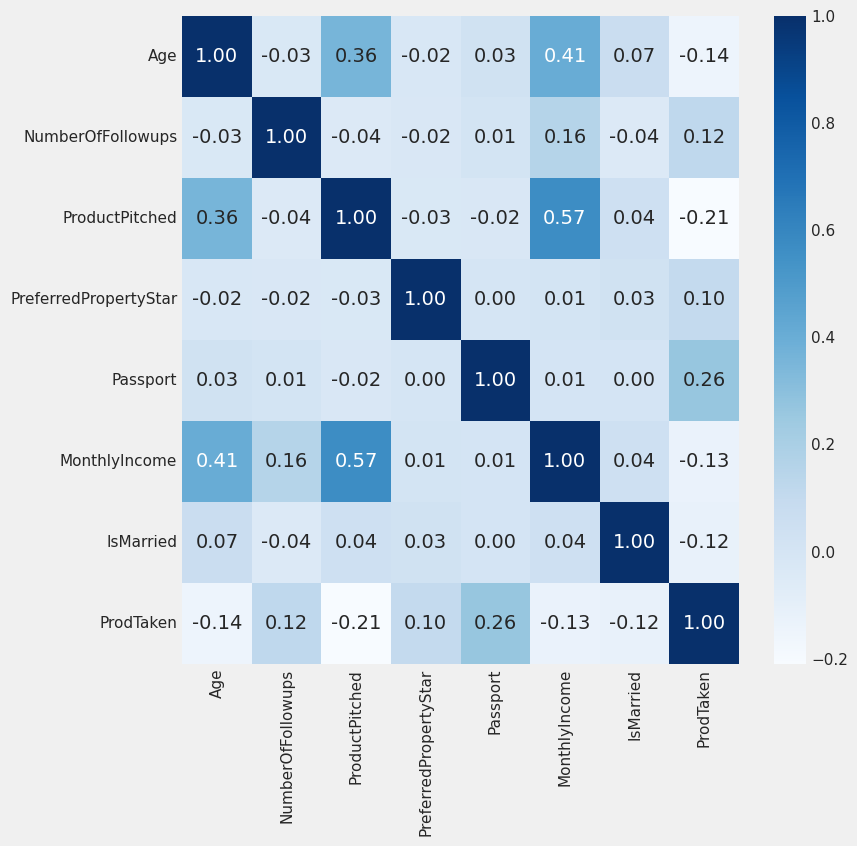

In [54]:
# ubah posisi ProdTaken ke paling kanan
df_drop = df_drop[['Age','NumberOfFollowups','ProductPitched','PreferredPropertyStar',
                   'Passport','MonthlyIncome','IsMarried', 'ProdTaken']].copy()

# cek korelasi lagi
plt.figure(figsize=(8, 8))
sns.heatmap(df_drop.corr(), cmap='Blues', annot=True, fmt='.2f')

In [55]:
# cek isi data
df_drop.sample(5)

Age  NumberOfFollowups  ProductPitched  PreferredPropertyStar  \
1346  0.886846                  4               2                      3   
2286  0.212907                  3               2                      4   
167  -0.798001                  3               1                      3   
4072  0.437553                  5               1                      3   
1713  0.325230                  3               2                      3   

      Passport  MonthlyIncome  IsMarried  ProdTaken  
1346         0       0.203792          1          0  
2286         0       0.212760          0          0  
167          0       0.239757          0          0  
4072         0       0.292113          1          0  
1713         0       0.177307          1          0

### **Splitting Data & Handling Class Imbalance**

In [56]:
# membagi data train dan test (70:30)
trainset, testset = train_test_split(df_drop, test_size=0.3, random_state=42)
print('Jumlah baris train set :', len(trainset))
print('Jumlah baris test set :', len(testset))

Jumlah baris train set : 3241
Jumlah baris test set : 1390


In [57]:
# cek fitur train set
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241 entries, 1329 to 876
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3241 non-null   float64
 1   NumberOfFollowups      3241 non-null   int64  
 2   ProductPitched         3241 non-null   int64  
 3   PreferredPropertyStar  3241 non-null   int64  
 4   Passport               3241 non-null   int64  
 5   MonthlyIncome          3241 non-null   float64
 6   IsMarried              3241 non-null   int64  
 7   ProdTaken              3241 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 227.9 KB


In [58]:
# split x dan y
x_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
x_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

In [59]:
print('Jumlah data train sebelum SMOTE terdiri dari', len(x_train), 'baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

# oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy=1,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)

print(f'Jumlah data train setelah SMOTE terdiri dari {len(x_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah data train sebelum SMOTE terdiri dari 3241 baris
Jumlah class 0 : 2596
Jumlah class 1 : 645

Jumlah data train setelah SMOTE terdiri dari 5192 baris
Jumlah class 0 : 2596
Jumlah class 1 : 2596



In [60]:
print('Jumlah baris x_train :', len(x_train))
print('Jumlah baris y_train :', len(y_train))
print('Jumlah baris x_test :', len(x_test))
print('Jumlah baris y_test :', len(y_test))

Jumlah baris x_train : 5192
Jumlah baris y_train : 5192
Jumlah baris x_test : 1390
Jumlah baris y_test : 1390


# **MACHINE LEARNING MODELLING & EVALUATION**

## **Preparation**

In [61]:
X = df_drop[['Age','NumberOfFollowups','ProductPitched','PreferredPropertyStar',
             'Passport','MonthlyIncome','IsMarried']].copy()
y = df_drop['ProdTaken']
X_train = x_train
X_test = x_test

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),'\n')
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

def eval_clf(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    precision = round(precision_score(y_test, y_pred), 4)
    precision_train = round(precision_score(y_train, y_pred_train), 4)

    return precision, precision_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['KNN','Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Precision (Test)', 'Precision (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_clf(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## **Modelling**

### **KNN**

In [64]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

F1-Score (Test Set): 0.47
roc_auc (test-proba): 0.76
Recall (Test Set): 0.62
Accuracy (Test Set): 0.75 

Precision (Test Set): 0.38
Precision (Train Set): 0.85


### **Decision Tree**

In [65]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.73
Recall (Test Set): 0.63
Accuracy (Test Set): 0.79 

Precision (Test Set): 0.44
Precision (Train Set): 1.00


### **Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.84
Recall (Test Set): 0.62
Accuracy (Test Set): 0.84 

Precision (Test Set): 0.53
Precision (Train Set): 1.00


### **Ada Boost Classifier**

In [67]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.74
Recall (Test Set): 0.64
Accuracy (Test Set): 0.72 

Precision (Test Set): 0.34
Precision (Train Set): 0.74


### **XGBoost**

In [68]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.82
Recall (Test Set): 0.62
Accuracy (Test Set): 0.84 

Precision (Test Set): 0.55
Precision (Train Set): 0.96


## **Model Evaluation**

In [69]:
model_list_base = [knn, dt, rf, clf, xg]
score_all_classification(model_list_base, x_train, y_train, x_test, y_test)

Model  Precision (Test)  Precision (Train)
0            KNN            0.3812             0.8453
1  Decision Tree            0.4429             1.0000
2  Random Forest            0.5310             0.9996
3       AdaBoost            0.3427             0.7402
4        XGBoost            0.5520             0.9647

Karena hasil dari precision nya kurang bagus, maka kami melakukan iterasi kembali ke feature selection.

# **FEATURE SELECTION (2)**

In [70]:
#panggil kembali df yg sudah di pre-processing
df_new.head()

CustomerID  ProdTaken       Age    TypeofContact  CityTier  \
0      200000          1  0.437553     Self Enquiry         3   
1      200001          0  1.336138  Company Invited         1   
2      200002          1 -0.011739     Self Enquiry         1   
3      200003          0 -0.461032  Company Invited         1   
4      200004          0 -0.011739     Self Enquiry         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0         0.008197        Salaried       0                       3   
1         0.073770        Salaried       1                       3   
2         0.024590     Free Lancer       1                       3   
3         0.032787        Salaried       0                       2   
4         0.024590  Small Business       1                       2   

   NumberOfFollowups  ...  NumberOfChildrenVisiting  Designation  \
0                  3  ...                         0            1   
1                  4  ...                         2            1   
2                  4  ...                         0            0   
3                  3  ...                         1            0   
4                  3  ...                         0            0   

  MonthlyIncome  Occupation_Free Lancer  Occupation_Large Business  \
0      0.204683                       0                          0   
1      0.195848                       0                          0   
2      0.164725                       1                          0   
3      0.173110                       0                          0   
4      0.178832                       0                          0   

   Occupation_Salaried  Occupation_Small Business  \
0                    1                          0   
1                    1                          0   
2                    0                          0   
3                    1                          0   
4                    0                          1   

   TypeofContact_Company Invited  TypeofContact_Self Enquiry  IsMarried  
0                              0                           1          0  
1                              1                           0          0  
2                              0                           1          0  
3                              1                           0          0  
4                              0                           1          0  

[5 rows x 27 columns]

In [71]:
# drop feature yang tidak terpakai
features = df_new.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus','Occupation_Salaried',
                                'Occupation_Large Business','Occupation_Free Lancer','Occupation_Small Business',
                                'TypeofContact_Company Invited','TypeofContact_Self Enquiry','OwnCar']).copy()

- fitur CustomerID di *drop* karena fitur tidak terpakai untuk pemodelan.
- fitur Occupation,TypeofContact & MaritalStatus di *drop* karena sudah kita encode sehingga fitur yg aslinya tidak terpakai.
- fitur Occupation_Salaried, Occupation_Large Business, Occupation_Small Business, Occupation_Free Lancer, TypeofContact_Company Invited, TypeofContact_Self Enquiry & OwnCar di *drop* karena korelasi fitur nya kecil terhadap kolom target dan juga fiturnya redundant.


In [72]:
#cek kembali isi dari df nya
features.head()

ProdTaken       Age  CityTier  DurationOfPitch  Gender  \
0          1  0.437553         3         0.008197       0   
1          0  1.336138         1         0.073770       1   
2          1 -0.011739         1         0.024590       1   
3          0 -0.461032         1         0.032787       0   
4          0 -0.011739         1         0.024590       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                       3                  3               2   
1                       3                  4               2   
2                       3                  4               0   
3                       2                  3               0   
4                       2                  3               0   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                      3              1         1                       2   
1                      4              2         0                       3   
2                      3              7         1                       3   
3                      3              2         1                       5   
4                      4              1         0                       5   

   NumberOfChildrenVisiting  Designation  MonthlyIncome  IsMarried  
0                         0            1       0.204683          0  
1                         2            1       0.195848          0  
2                         0            0       0.164725          0  
3                         1            0       0.173110          0  
4                         0            0       0.178832          0

In [73]:
# cek fitur train set
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4631 non-null   int64  
 1   Age                       4631 non-null   float64
 2   CityTier                  4631 non-null   int64  
 3   DurationOfPitch           4631 non-null   float64
 4   Gender                    4631 non-null   int8   
 5   NumberOfPersonVisiting    4631 non-null   int64  
 6   NumberOfFollowups         4631 non-null   int64  
 7   ProductPitched            4631 non-null   int64  
 8   PreferredPropertyStar     4631 non-null   int64  
 9   NumberOfTrips             4631 non-null   int64  
 10  Passport                  4631 non-null   int64  
 11  PitchSatisfactionScore    4631 non-null   int64  
 12  NumberOfChildrenVisiting  4631 non-null   int64  
 13  Designation               4631 non-null   int64  
 14  MonthlyI

In [74]:
# membagi data train dan test (70:30)
trainset, testset = train_test_split(features, test_size=0.3, random_state=42)
print('Jumlah baris train set :', len(trainset))
print('Jumlah baris test set :', len(testset))

Jumlah baris train set : 3241
Jumlah baris test set : 1390


In [75]:
# split x dan y
x_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
x_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

In [76]:
X = features.drop(columns=['ProdTaken']).copy()
y = features['ProdTaken']
X_train = x_train
X_test = x_test

print('Jumlah baris x_train :', len(x_train))
print('Jumlah baris y_train :', len(y_train))
print('Jumlah baris x_test :', len(x_test))
print('Jumlah baris y_test :', len(y_test))

Jumlah baris x_train : 3241
Jumlah baris y_train : 3241
Jumlah baris x_test : 1390
Jumlah baris y_test : 1390


In [77]:
#cek precision fitur menggunakan xgboost
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.93
Recall (Test Set): 0.69
Accuracy (Test Set): 0.92 

Precision (Test Set): 0.85
Precision (Train Set): 1.00


walaupun hasil dari precision sudah membaik tetapi modelnya masih overfit, maka kita akan coba mendrop beberapa fitur yg tidak terlalu penting dengan cara melihat feature importance-nya

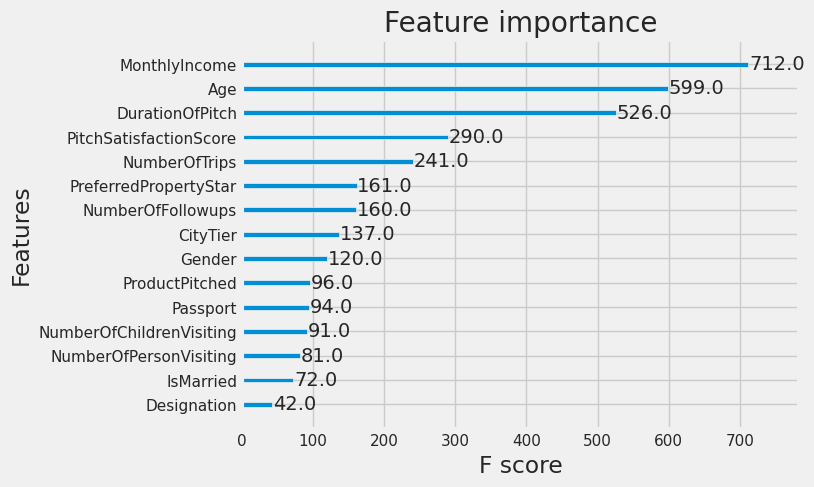

In [78]:
#cek feature importance nya

# plot feature importance using XGboost
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

In [79]:
# drop fitur yg tidak terlalu penting
features = features.drop(columns=['Designation','NumberOfChildrenVisiting','IsMarried',
                                  'NumberOfPersonVisiting','Gender']).copy()

In [80]:
# cek fitur
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4631 entries, 0 to 4887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4631 non-null   int64  
 1   Age                     4631 non-null   float64
 2   CityTier                4631 non-null   int64  
 3   DurationOfPitch         4631 non-null   float64
 4   NumberOfFollowups       4631 non-null   int64  
 5   ProductPitched          4631 non-null   int64  
 6   PreferredPropertyStar   4631 non-null   int64  
 7   NumberOfTrips           4631 non-null   int64  
 8   Passport                4631 non-null   int64  
 9   PitchSatisfactionScore  4631 non-null   int64  
 10  MonthlyIncome           4631 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 563.2 KB


<Axes: >

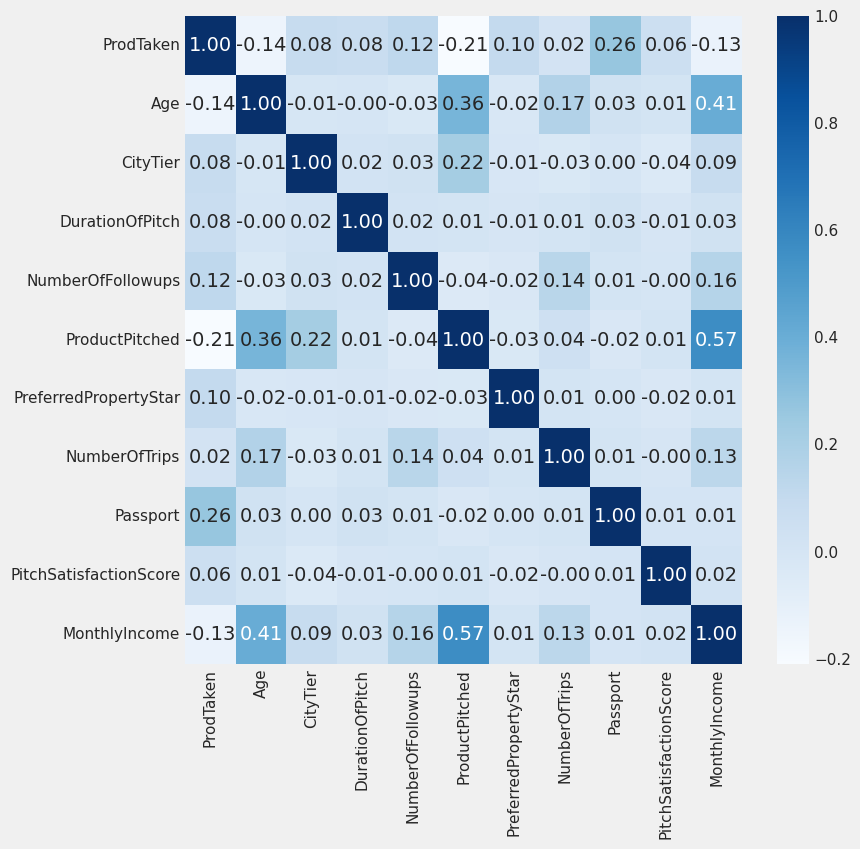

In [81]:
# cek korelasi features untuk melihat apakah ada fitur yg redundant
plt.figure(figsize=(8, 8))
sns.heatmap(features.corr(), cmap='Blues', annot=True, fmt='.2f')

In [82]:
# membagi data train dan test (70:30)
trainset, testset = train_test_split(features, test_size=0.3, random_state=42)
print('Jumlah baris train set :', len(trainset))
print('Jumlah baris test set :', len(testset))

Jumlah baris train set : 3241
Jumlah baris test set : 1390


In [83]:
# split x dan y
x_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
x_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

In [84]:
print('Jumlah data train sebelum SMOTE terdiri dari', len(x_train), 'baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

# oversampling menggunakan SMOTE
smote = SMOTE(sampling_strategy=0.5,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)

print(f'Jumlah data train setelah SMOTE terdiri dari {len(x_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah data train sebelum SMOTE terdiri dari 3241 baris
Jumlah class 0 : 2596
Jumlah class 1 : 645

Jumlah data train setelah SMOTE terdiri dari 3894 baris
Jumlah class 0 : 2596
Jumlah class 1 : 1298



In [85]:
X = features.drop(columns=['ProdTaken']).copy()
y = features['ProdTaken']
X_train = x_train
X_test = x_test

print('Jumlah baris x_train :', len(x_train))
print('Jumlah baris y_train :', len(y_train))
print('Jumlah baris x_test :', len(x_test))
print('Jumlah baris y_test :', len(y_test))

Jumlah baris x_train : 3894
Jumlah baris y_train : 3894
Jumlah baris x_test : 1390
Jumlah baris y_test : 1390


# **MACHINE LEARNING MODELLING & EVALUATION (2)**

## **Modelling**

### **KNN**

In [86]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.83
Recall (Test Set): 0.60
Accuracy (Test Set): 0.83 

Precision (Test Set): 0.52
Precision (Train Set): 0.82


### **Decision Tree**

In [87]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.83
Recall (Test Set): 0.74
Accuracy (Test Set): 0.89 

Precision (Test Set): 0.69
Precision (Train Set): 1.00


### **Random Forest Classifier**

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

F1-Score (Test Set): 0.78
roc_auc (test-proba): 0.93
Recall (Test Set): 0.73
Accuracy (Test Set): 0.93 

Precision (Test Set): 0.83
Precision (Train Set): 1.00


### **Ada Boost Classifier**

In [89]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

F1-Score (Test Set): 0.48
roc_auc (test-proba): 0.77
Recall (Test Set): 0.47
Accuracy (Test Set): 0.82 

Precision (Test Set): 0.49
Precision (Train Set): 0.70


### **XGBoost**

In [90]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.92
Recall (Test Set): 0.70
Accuracy (Test Set): 0.92 

Precision (Test Set): 0.81
Precision (Train Set): 1.00


## **Model Evaluation**

In [91]:
model_list_base = [knn, dt, rf, clf, xg]
score_all_classification(model_list_base, x_train, y_train, x_test, y_test)

Model  Precision (Test)  Precision (Train)
0            KNN            0.5211             0.8226
1  Decision Tree            0.6894             1.0000
2  Random Forest            0.8265             1.0000
3       AdaBoost            0.4916             0.6978
4        XGBoost            0.8113             0.9992

Karena hasil precision yang paling baik adalah model dari **Random Forest & XGBoost**, maka kami pilih kedua model tersebut untuk dilanjutkan ke tahap hyperparameter tuning agar mendapatkan hasil precision yang lebih optimal.

## **Hyperparameter Tuning**

### **Random Forest Classifier**

**Before Tuning**

In [92]:
#sebelum dilakukan hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

F1-Score (Test Set): 0.79
roc_auc (test-proba): 0.94
Recall (Test Set): 0.73
Accuracy (Test Set): 0.93 

Precision (Test Set): 0.86
Precision (Train Set): 1.00


In [93]:
# cross validation
from sklearn.model_selection import cross_validate

model = rf
score_rf = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
print('precision (train): '+ str(score_rf['train_score'].mean()))
print('precision (test): '+ str(score_rf['test_score'].mean()))

precision (train): 1.0
precision (test): 0.9519538859073743


**After Tuning**

In [94]:
#setelah dilakukan hyperparameter tuning
rf_tuned = RandomForestClassifier(n_estimators=10,max_depth=28,criterion='entropy',random_state=42)
rf_tuned.fit(X_train, y_train)
eval_classification(rf_tuned)

F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.91
Recall (Test Set): 0.66
Accuracy (Test Set): 0.92 

Precision (Test Set): 0.87
Precision (Train Set): 1.00


In [95]:
# cross validation
from sklearn.model_selection import cross_validate
model = rf_tuned
score_rf = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
print('precision (train): '+ str(score_rf['train_score'].mean()))
print('precision (test): '+ str(score_rf['test_score'].mean()))

precision (train): 0.9985433627280103
precision (test): 0.9404875010184744


### **XGBoost**

**Before Tuning**

In [96]:
#sebelum dilakukan hyperparameter tuning
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

F1-Score (Test Set): 0.75
roc_auc (test-proba): 0.92
Recall (Test Set): 0.70
Accuracy (Test Set): 0.92 

Precision (Test Set): 0.81
Precision (Train Set): 1.00


In [97]:
# cross validation
from sklearn.model_selection import cross_validate
score_xg = cross_validate(xg, X, y, cv=5, scoring='precision', return_train_score=True)
print('precision (train): '+ str(score_xg['train_score'].mean()))
print('precision (test): '+ str(score_xg['test_score'].mean()))

precision (train): 1.0
precision (test): 0.9094096552805221


**After Tuning**

In [98]:
#setelah dilakukan hyperparameter tuning
from xgboost import XGBClassifier
xg_tuned = XGBClassifier(n_estimators=25,max_depth=19,gamma=1,learning_rate=0.3693877551020408,random_state=42)
xg_tuned.fit(X_train, y_train)
eval_classification(xg_tuned)

F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.89
Recall (Test Set): 0.65
Accuracy (Test Set): 0.90 

Precision (Test Set): 0.77
Precision (Train Set): 0.99


In [99]:
# cross validation
from sklearn.model_selection import cross_validate
score_xg = cross_validate(xg_tuned, X, y, cv=5, scoring='precision', return_train_score=True)
print('precision (train): '+ str(score_xg['train_score'].mean()))
print('precision (test): '+ str(score_xg['test_score'].mean()))

precision (train): 0.9871384970646273
precision (test): 0.898570863015468


### **Cross Validation Model Evaluation**

In [100]:
eval_cols = ['Model', 'Precision (Test)', 'Precision (Train)']
model_name = ['Random Forest','XGBoost']
test = [round(float(score_rf['test_score'].mean()),4), round(float(score_xg['test_score'].mean()),4)]
train = [round(float(score_rf['train_score'].mean()),4), round(float(score_xg['train_score'].mean()),4)]

df_cv = pd.DataFrame(list(zip(model_name, test, train)),
               columns = eval_cols)
df_cv

Model  Precision (Test)  Precision (Train)
0  Random Forest            0.9405             0.9985
1        XGBoost            0.8986             0.9871

Dapat dilihat pada hasil evaluation di atas, model yang memiliki hasil paling baik adalah **Random Forest**, karena precision dari data test & trainnya sebesar **0.94 & 0.99** sehingga kami pilih **Random Forest** sebagai **Best-Fit Model**.

## **Feature Importance**

**Feature Importance dari model Random Forest yang sudah dilakukan Hyperparameter Tuning**



In [101]:
import shap
explainer = shap.TreeExplainer(rf_tuned)
shap_values = explainer.shap_values(X_test)

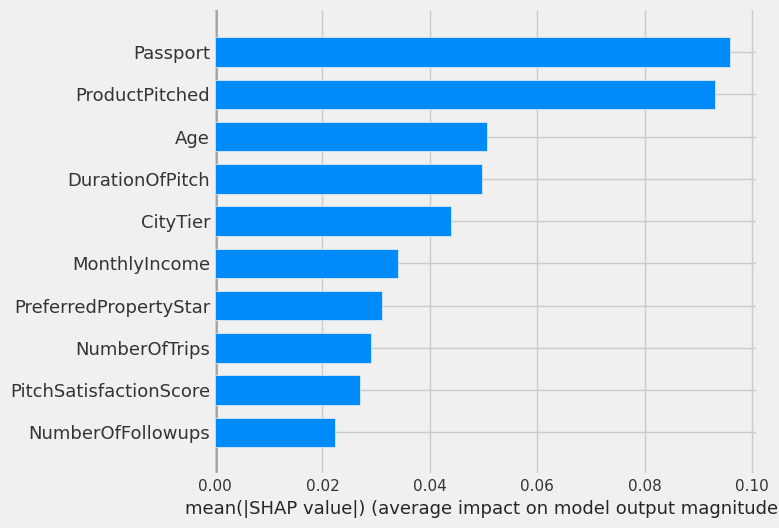

In [102]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

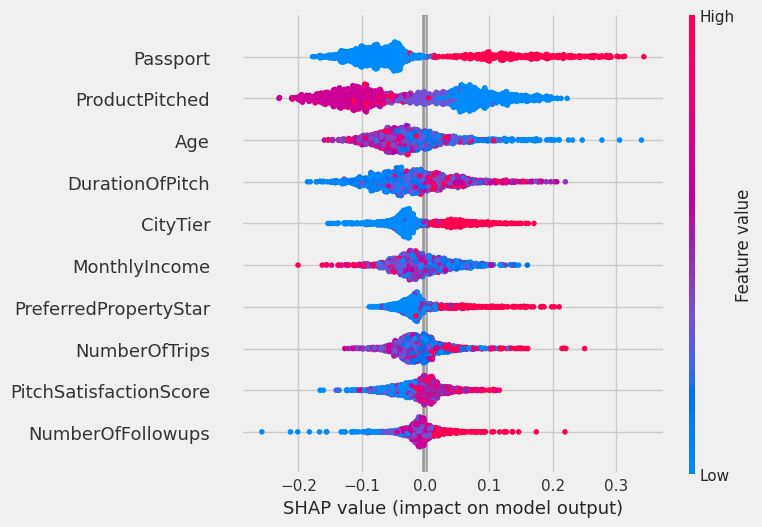

In [103]:
shap.summary_plot(shap_values[1], X_test)

# **TEST MODEL PADA DATA DUMMY**

## **Data Preparation**

### **Import Dataset**

In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

### **Handling Missing Value & Invalid Data Types**

In [105]:
# drop missing value
df.dropna(subset=['Age','DurationOfPitch','NumberOfFollowups', 'MonthlyIncome','TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

In [106]:
# ubah tipe data dari float menjadi integer
df = df.astype({"Age":'int', "DurationOfPitch":'int','NumberOfFollowups':'int', 'PreferredPropertyStar':'int',
                        "NumberOfTrips":'int', "NumberOfChildrenVisiting":'int', "MonthlyIncome":'int'})

### **Handling Invalid Value & Feature Transformation**

In [107]:
# ubah value Fe Male menjadi Female
df = df.replace('Fe Male', 'Female')

In [108]:
# DurationOfPitch dan MonthlyIncome dinormalisasi/re-scale
df['MonthlyIncome'] = MinMaxScaler().fit_transform(df['MonthlyIncome'].values.reshape(len(df), 1))
df['DurationOfPitch'] = MinMaxScaler().fit_transform(df['DurationOfPitch'].values.reshape(len(df), 1))

# Age distandarisasi (karena distribusi datanya sudah mendekati normal)
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

### **Feature Encoding & Selection**

In [109]:
# menjalankan function Product
df['ProductPitched'] = df.apply(lambda x: product(x), axis=1)

In [110]:
# drop feature yang tidak terpakai
dummy = df.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus',
                         'OwnCar','Designation','NumberOfChildrenVisiting',
                         'NumberOfPersonVisiting','Gender']).copy()

In [111]:
dummy.head()

ProdTaken       Age  CityTier  DurationOfPitch  NumberOfFollowups  \
0          1  0.410771         3         0.008197                  3   
1          0  1.282857         1         0.073770                  4   
2          1 -0.025272         1         0.024590                  4   
3          0 -0.461315         1         0.032787                  3   
5          0 -0.570326         1         0.024590                  3   

   ProductPitched  PreferredPropertyStar  NumberOfTrips  Passport  \
0               2                      3              1         1   
1               2                      4              2         0   
2               0                      3              7         1   
3               0                      3              2         1   
5               0                      3              1         0   

   PitchSatisfactionScore  MonthlyIncome  
0                       2       0.204683  
1                       3       0.195848  
2                       3       0.164725  
3                       5       0.173110  
5                       5       0.174737

In [112]:
# cek fitur dummy set
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4128 non-null   int64  
 1   Age                     4128 non-null   float64
 2   CityTier                4128 non-null   int64  
 3   DurationOfPitch         4128 non-null   float64
 4   NumberOfFollowups       4128 non-null   int64  
 5   ProductPitched          4128 non-null   int64  
 6   PreferredPropertyStar   4128 non-null   int64  
 7   NumberOfTrips           4128 non-null   int64  
 8   Passport                4128 non-null   int64  
 9   PitchSatisfactionScore  4128 non-null   int64  
 10  MonthlyIncome           4128 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 387.0 KB


## **Model Testing**

### **Split X & y**

In [113]:
X = dummy.drop(columns=['ProdTaken']).copy()
y = dummy['ProdTaken']

### **Predict Dummy Data**

In [114]:
y_pred = rf_tuned.predict(X)
y_true = y
print("Precision: %.2f" % precision_score(y_true, y_pred))

Precision: 0.97


### **Confusion Matrix**

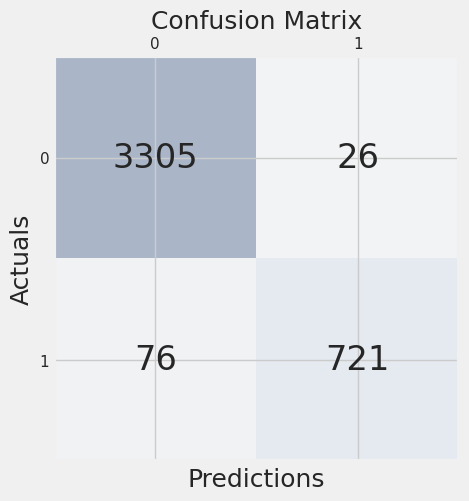

In [115]:
from sklearn.metrics import confusion_matrix
y_pred = rf_tuned.predict(X)
y_true = y
conf_matrix = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## **Business Simulation**

### **Conversion Rate**

**Conversion Rate (Before)**

In [116]:
# Cek banyaknya customer yg beli (1) dan menolak (0) paket sebelum adanya machine learning
df['ProdTaken'].value_counts()

0    3331
1     797
Name: ProdTaken, dtype: int64

In [117]:
#hitung conversion rate
customer_yg_beli  = 920  #ProdTaken==1
customer_yg_nolak = 3968 #ProdTaken==0

conversion_rate = customer_yg_beli / (customer_yg_beli + customer_yg_nolak)
print('Conversion Rate (Before):', round(conversion_rate,2))

Conversion Rate (Before): 0.19



**Conversion Rate (After)**

In [118]:
# Cek banyaknya customer yg beli (TP) dan menolak (FP) paket setelah adanya machine learning
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]

print('TP:',TP,'FP:',FP)

TP: 721 FP: 26


In [119]:
#hitung conversion rate
customer_yg_beli  = 721 #TP
customer_yg_nolak = 26  #FP

conversion_rate = customer_yg_beli / (customer_yg_beli + customer_yg_nolak)
print('Conversion Rate (After):', round(conversion_rate,2))

Conversion Rate (After): 0.97


### **Total Revenue**

Menghitung **total revenue** dengan asumsi biaya marketing per *pitch*-nya 1/10 dari keuntungan penjualan per-paketnya. ex: keuntungan per-paket Rp1.000.000 maka, biaya marketing per-paketnya Rp100.000

**Total Revenue (Before)**

In [120]:
# Cek banyaknya customer yg beli (1) dan menolak (0) paket sebelum adanya machine learning
df['ProdTaken'].value_counts()

0    3331
1     797
Name: ProdTaken, dtype: int64

In [121]:
# Total Revenue sebelum adanya machine learning
customer_yg_beli   = 920   #ProdTaken==1
customer_yg_nolak  = 3968  #ProdTaken==0
profit_per_package = 1000000
cost_per_marketing = 100000

revenue = (customer_yg_beli * profit_per_package) - ((customer_yg_beli+customer_yg_nolak)*cost_per_marketing)
print(revenue,'Rupiah')

431200000 Rupiah


**Total Revenue (After)**

In [122]:
# Cek banyaknya customer yg beli (TP) dan menolak (FP) paket setelah adanya machine learning
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]

print('TP:',TP,'FP:',FP)

TP: 721 FP: 26


In [123]:
# Total Revenue sesudah adanya model
customer_yg_beli   = 721  #TP
customer_yg_nolak  = 26   #FP
profit_per_package = 1000000
cost_per_marketing = 100000

revenue = (customer_yg_beli * profit_per_package) - ((customer_yg_beli+customer_yg_nolak)*cost_per_marketing)
print(revenue,'Rupiah')

646300000 Rupiah
